In [47]:
from os import sys
import os
sys.path.append('../../')

# Getting packages #
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import main

import plotly.express as px

# import main
import propellers
import motors
from aircraft import airplane
import cl_finders

# Setting Plot Defaults
plt.style.use('../../basic_plotter.mplstyle')

In [48]:
### Definining name of analysis ###
name = 'thesis_steady_results'

figure_path = "/Users/williamkemp/Dropbox/Apps/Overleaf/Thesis_Draft_05_thefinalhurrah/Figures/"
# figure_path = '../Figures/'+name+'/'
# if not os.path.exists(figure_path):
#     os.makedirs(figure_path)


In [49]:
# Importing Drag Build Ups
build_turbulent = pd.read_pickle("../../DragBuilds/CREATeV_DragBuildTurbulent.pkl")
build_laminar = pd.read_pickle("../../DragBuilds/CREATeV_DragBuildLaminar.pkl")

In [50]:
path_1 = '../Results/2021-08-04_Cruise_Analysis_Cleaned/'
path_2 = '../Results/2022-06-13_CREATeV_Cruise_2022-04-30_Analysis_Cleaned/'
path_3 = '../Results/2022-06-15_CREATeV_Cruise_Analysis_Cleaned/'
path_4 = '../Results/2023-07-06_CREATeV_Cruise_Analysis_Cleaned/'

In [51]:
mass = 12.6 # Estimated with virtual bolt included
span = 6.28
chord = 0.395
createv = airplane(mass, chord, span)

In [52]:
# All Cruise Results Manually Segmented

ct_cruise_segresult_2021 = pd.read_pickle(path_1+'ct_cruise_segresult.pkl')
eta_cruise_segresult_2021 = pd.read_pickle(path_1+'eta_cruise_segresult.pkl')

ct_cruise_segresult_2022_06_13 = pd.read_pickle(path_2+'ct_cruise_segresult.pkl')
eta_cruise_segresult_2022_06_13 = pd.read_pickle(path_2+'eta_cruise_segresult.pkl')

ct_cruise_segresult_2022_06_15 = pd.read_pickle(path_3+'ct_cruise_segresult.pkl')
eta_cruise_segresult_2022_06_15 = pd.read_pickle(path_3+'eta_cruise_segresult.pkl')

ct_cruise_segresult_2023 = pd.read_pickle(path_4+'ct_cruise_segresult.pkl')
eta_cruise_segresult_2023 = pd.read_pickle(path_4+'eta_cruise_segresult.pkl')

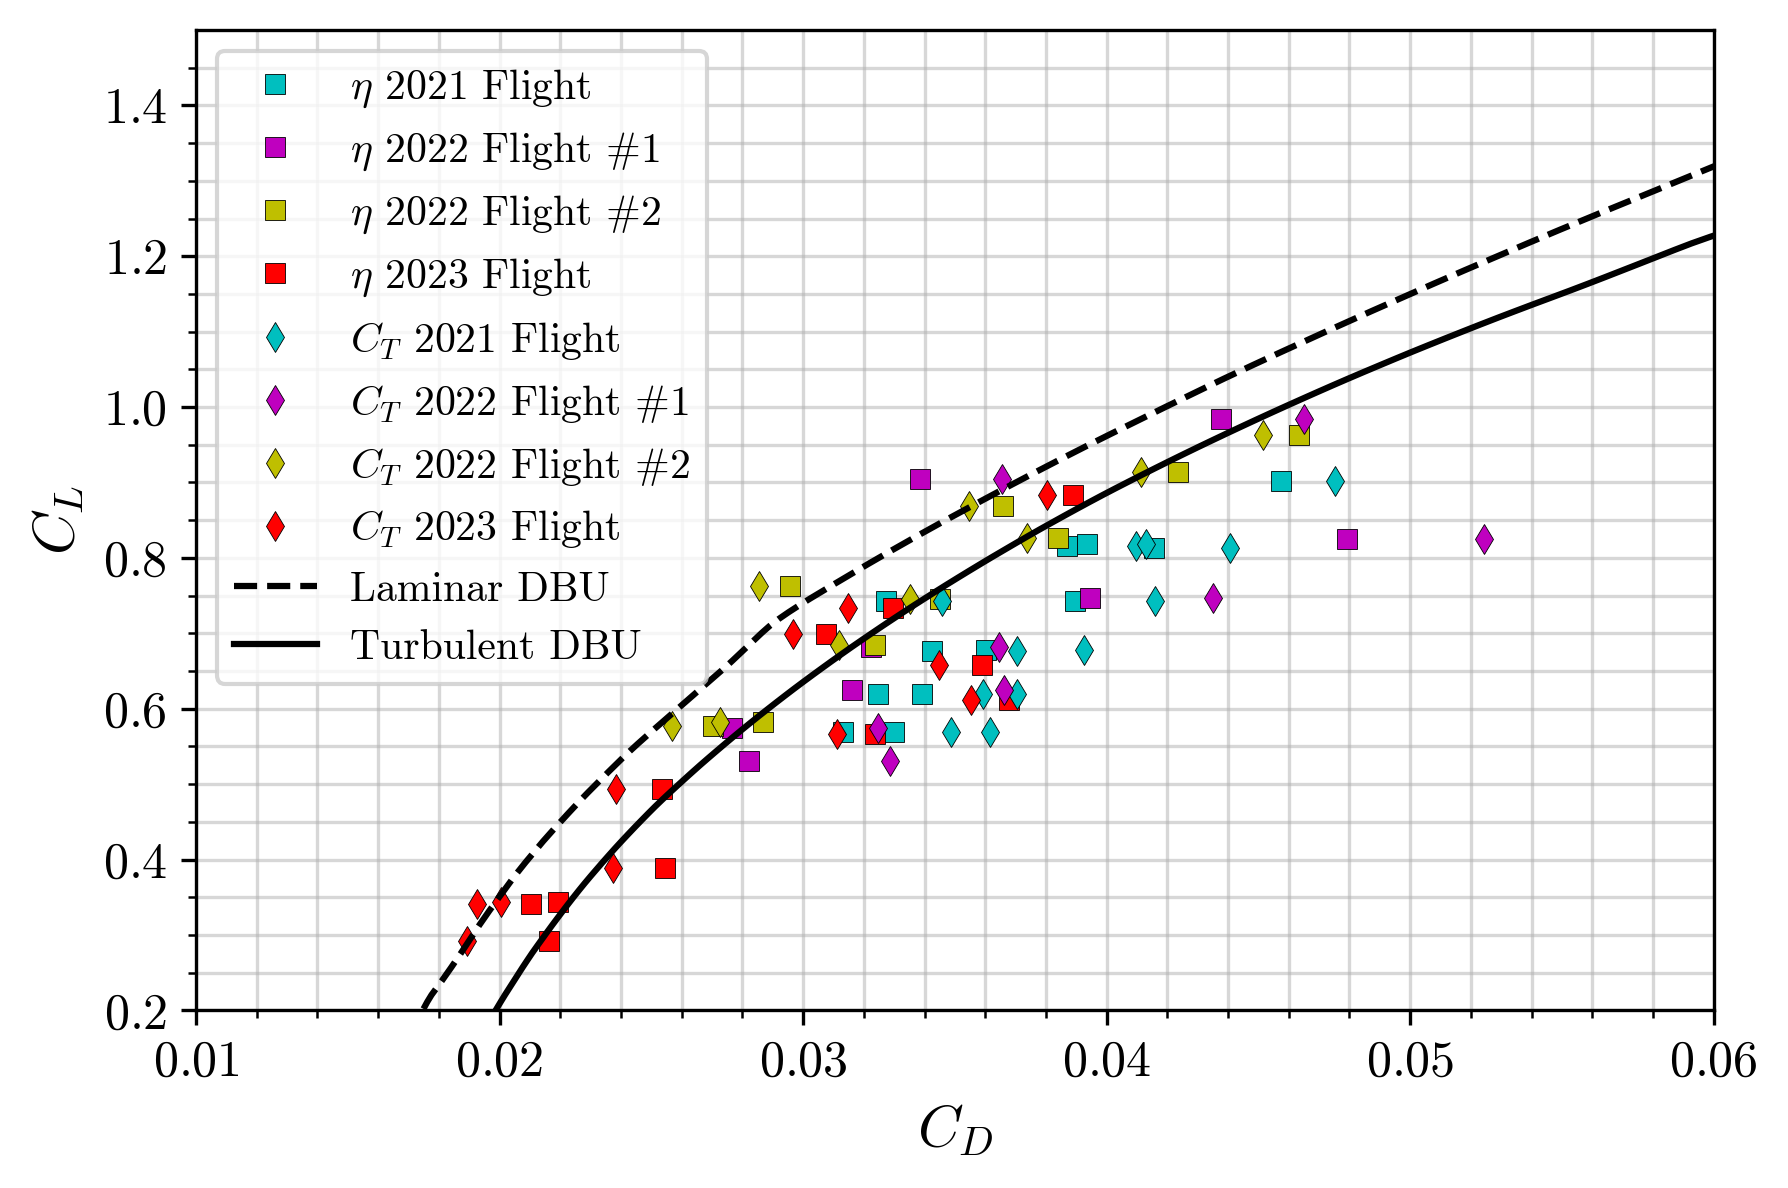

In [53]:
polar_cruise_comparison_raw = plt.figure(dpi=300, figsize=(6,4))

plt.plot(eta_cruise_segresult_2021.ave_polar.CD, eta_cruise_segresult_2021.ave_polar.CL, marker='s', markersize=5, color='c', linestyle='', label="$\eta$ 2021 Flight")

plt.plot(eta_cruise_segresult_2022_06_13.ave_polar.CD, eta_cruise_segresult_2022_06_13.ave_polar.CL, marker='s', markersize=5, color='m', linestyle='', label="$\eta$ 2022 Flight #1")

plt.plot(eta_cruise_segresult_2022_06_15.ave_polar.CD, eta_cruise_segresult_2022_06_15.ave_polar.CL, marker='s', markersize=5, color='y', linestyle='', label="$\eta$ 2022 Flight #2")

plt.plot(eta_cruise_segresult_2023.ave_polar.CD, eta_cruise_segresult_2023.ave_polar.CL, marker='s', markersize=5, color='r', linestyle='', label="$\eta$ 2023 Flight")

plt.plot(ct_cruise_segresult_2021.ave_polar.CD, ct_cruise_segresult_2021.ave_polar.CL, marker='d', markersize=5, color='c', linestyle='', label="$C_T$ 2021 Flight")

plt.plot(ct_cruise_segresult_2022_06_13.ave_polar.CD, ct_cruise_segresult_2022_06_13.ave_polar.CL, marker='d', markersize=5, color='m', linestyle='', label="$C_T$ 2022 Flight #1")

plt.plot(ct_cruise_segresult_2022_06_15.ave_polar.CD, ct_cruise_segresult_2022_06_15.ave_polar.CL, marker='d', markersize=5, color='y', linestyle='', label="$C_T$ 2022 Flight #2")

plt.plot(ct_cruise_segresult_2023.ave_polar.CD, ct_cruise_segresult_2023.ave_polar.CL, marker='d', markersize=5, color='r', linestyle='', label="$C_T$ 2023 Flight")

plt.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')
plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label='Turbulent DBU')

plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.xlim([0.01, 0.06])
plt.ylim([0.2, 1.5])
plt.show()

main.save_figure(polar_cruise_comparison_raw, f'{polar_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

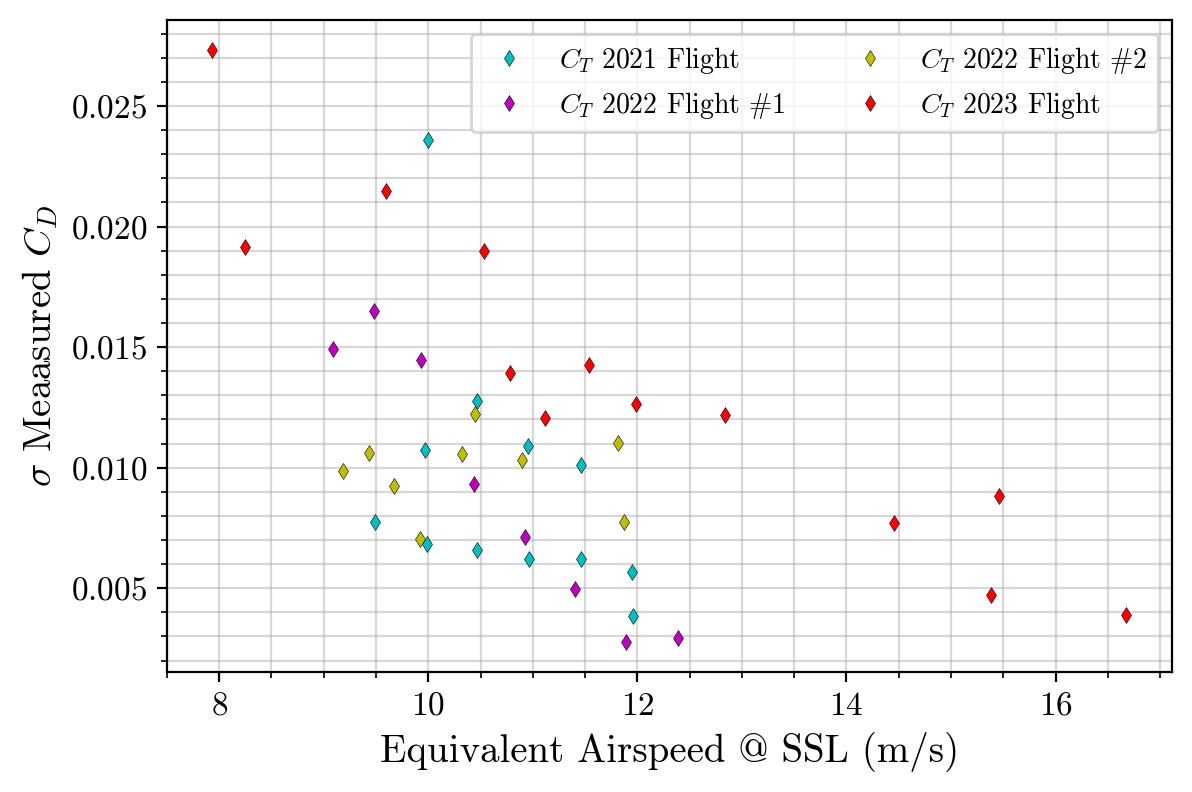

In [54]:
# Getting Power Required from CL, CD
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2021.ave_polar.CL , ct_cruise_segresult_2021.ave_polar.CD)
plt.plot(EAS, ct_cruise_segresult_2021.std_polar.CD, linestyle='', marker='d', color='c', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_13.ave_polar.CL , ct_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(EAS, ct_cruise_segresult_2022_06_13.std_polar.CD, linestyle='', marker='d', color='m', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, ct_cruise_segresult_2022_06_15.std_polar.CD, linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2023.ave_polar.CL , ct_cruise_segresult_2023.ave_polar.CD)
plt.plot(EAS, ct_cruise_segresult_2023.std_polar.CD, linestyle='', marker='d', color='r', label="$C_T$ 2023 Flight")

plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("$\sigma$ Meaasured $C_D$")
plt.legend(ncol=2, loc='best', fancybox=True)
plt.show()
# main.save_figure(preq_cruise_comparison_raw, f'{preq_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

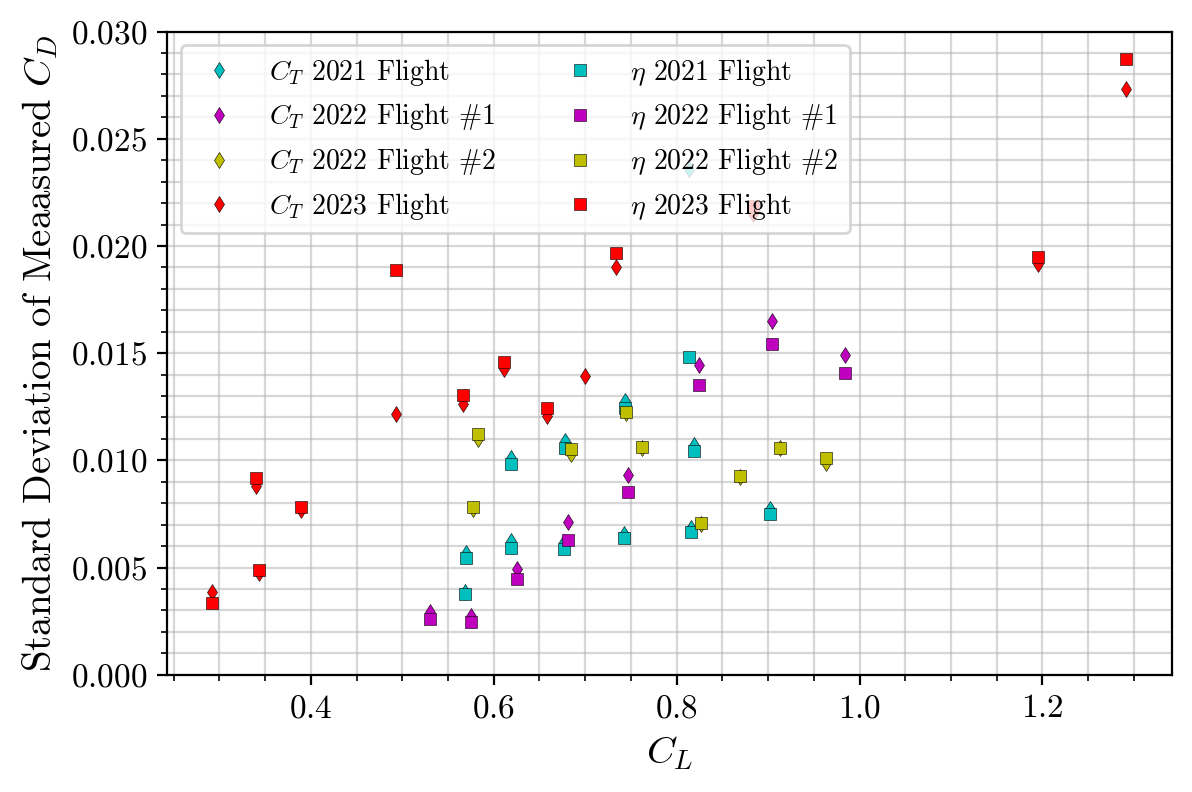

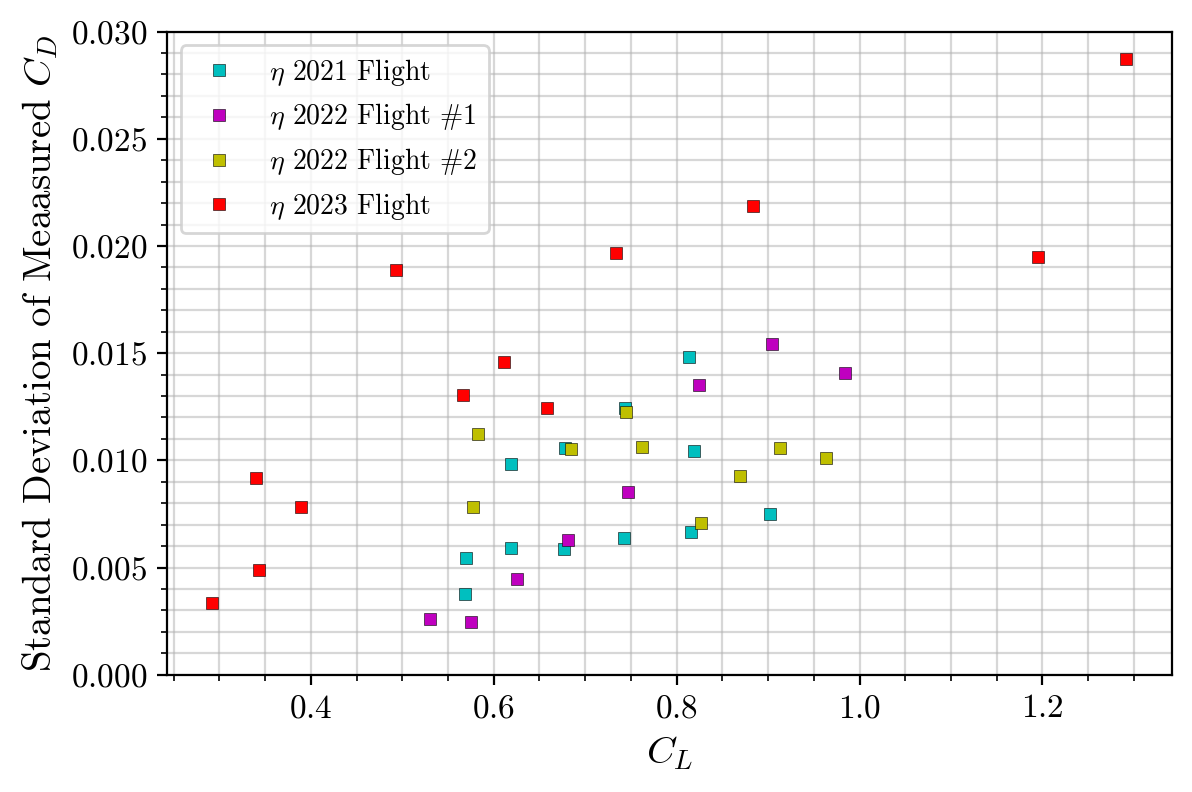

In [55]:
# Getting Power Required from CL, CD
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2021.ave_polar.CL , ct_cruise_segresult_2021.ave_polar.CD)
plt.plot(ct_cruise_segresult_2021.ave_polar.CL, ct_cruise_segresult_2021.std_polar.CD, linestyle='', marker='d', color='c', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_13.ave_polar.CL , ct_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(ct_cruise_segresult_2022_06_13.ave_polar.CL, ct_cruise_segresult_2022_06_13.std_polar.CD, linestyle='', marker='d', color='m', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(ct_cruise_segresult_2022_06_15.ave_polar.CL, ct_cruise_segresult_2022_06_15.std_polar.CD, linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2023.ave_polar.CL , ct_cruise_segresult_2023.ave_polar.CD)
plt.plot(ct_cruise_segresult_2023.ave_polar.CL, ct_cruise_segresult_2023.std_polar.CD, linestyle='', marker='d', color='r', label="$C_T$ 2023 Flight")

##
[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2021.ave_polar.CL , eta_cruise_segresult_2021.ave_polar.CD)
plt.plot(eta_cruise_segresult_2021.ave_polar.CL, eta_cruise_segresult_2021.std_polar.CD, linestyle='', marker='s', color='c', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_13.ave_polar.CL , eta_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(eta_cruise_segresult_2022_06_13.ave_polar.CL, eta_cruise_segresult_2022_06_13.std_polar.CD, linestyle='', marker='s', color='m', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(eta_cruise_segresult_2022_06_15.ave_polar.CL, eta_cruise_segresult_2022_06_15.std_polar.CD, linestyle='', marker='s', color='y', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2023.ave_polar.CL , eta_cruise_segresult_2023.ave_polar.CD)
plt.plot(eta_cruise_segresult_2023.ave_polar.CL, eta_cruise_segresult_2023.std_polar.CD, linestyle='', marker='s', color='r', label="$\eta$ 2023 Flight")
##

plt.xlabel("$C_L$")
plt.ylabel("Standard Deviation of Meaasured $C_D$")
plt.ylim([0,0.03])
plt.legend(ncol=2, loc='best')
plt.show()
# main.save_figure(preq_cruise_comparison_raw, f'{preq_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

# Plotting
preq_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2021.ave_polar.CL , eta_cruise_segresult_2021.ave_polar.CD)
plt.plot(eta_cruise_segresult_2021.ave_polar.CL, eta_cruise_segresult_2021.std_polar.CD, linestyle='', marker='s', color='c', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_13.ave_polar.CL , eta_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(eta_cruise_segresult_2022_06_13.ave_polar.CL, eta_cruise_segresult_2022_06_13.std_polar.CD, linestyle='', marker='s', color='m', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(eta_cruise_segresult_2022_06_15.ave_polar.CL, eta_cruise_segresult_2022_06_15.std_polar.CD, linestyle='', marker='s', color='y', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2023.ave_polar.CL , eta_cruise_segresult_2023.ave_polar.CD)
plt.plot(eta_cruise_segresult_2023.ave_polar.CL, eta_cruise_segresult_2023.std_polar.CD, linestyle='', marker='s', color='r', label="$\eta$ 2023 Flight")

plt.xlabel("$C_L$")
plt.ylabel("Standard Deviation of Meaasured $C_D$")
plt.ylim([0,0.03])
plt.legend(ncol=1, loc='best')
plt.show()
# main.save_figure(preq_cruise_comparison_raw, f'{preq_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

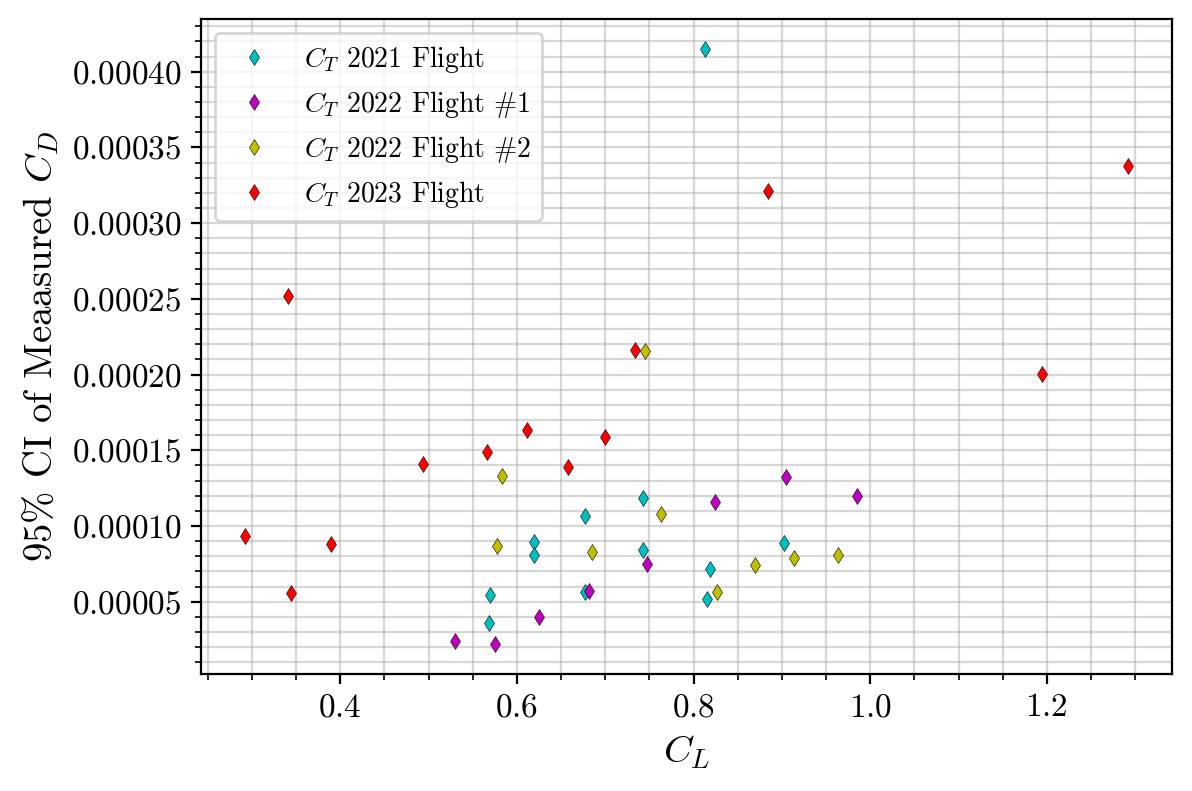

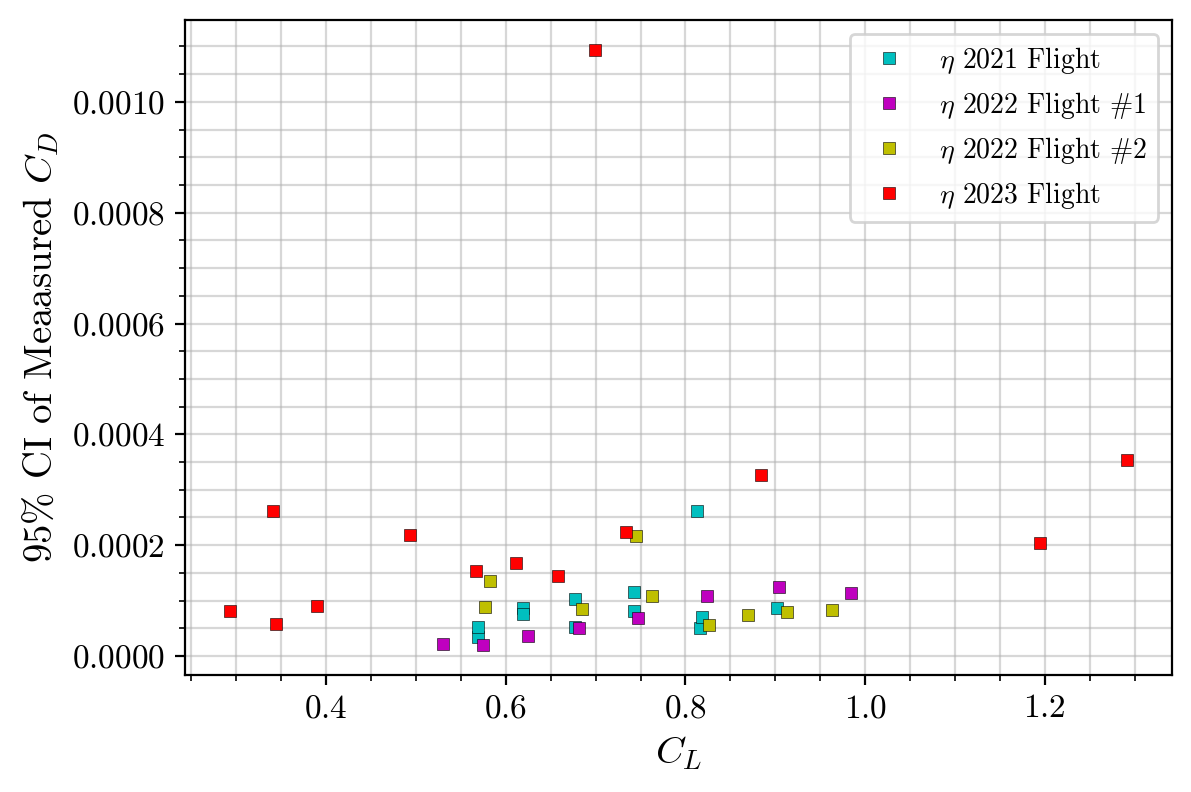

In [56]:
# Getting Power Required from CL, CD
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2021.ave_polar.CL , ct_cruise_segresult_2021.ave_polar.CD)
plt.plot(ct_cruise_segresult_2021.ave_polar.CL, ct_cruise_segresult_2021.ci95_polar.CD, linestyle='', marker='d', color='c', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_13.ave_polar.CL , ct_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(ct_cruise_segresult_2022_06_13.ave_polar.CL, ct_cruise_segresult_2022_06_13.ci95_polar.CD, linestyle='', marker='d', color='m', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(ct_cruise_segresult_2022_06_15.ave_polar.CL, ct_cruise_segresult_2022_06_15.ci95_polar.CD, linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2023.ave_polar.CL , ct_cruise_segresult_2023.ave_polar.CD)
plt.plot(ct_cruise_segresult_2023.ave_polar.CL, ct_cruise_segresult_2023.ci95_polar.CD, linestyle='', marker='d', color='r', label="$C_T$ 2023 Flight")

plt.xlabel("$C_L$")
plt.ylabel("95% CI of Meaasured $C_D$")
plt.legend(ncol=1, loc='best')
plt.show()
# main.save_figure(preq_cruise_comparison_raw, f'{preq_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

# Plotting
preq_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6, 4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2021.ave_polar.CL , eta_cruise_segresult_2021.ave_polar.CD)
plt.plot(eta_cruise_segresult_2021.ave_polar.CL, eta_cruise_segresult_2021.ci95_polar.CD, linestyle='', marker='s', color='c', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_13.ave_polar.CL , eta_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(eta_cruise_segresult_2022_06_13.ave_polar.CL, eta_cruise_segresult_2022_06_13.ci95_polar.CD, linestyle='', marker='s', color='m', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(eta_cruise_segresult_2022_06_15.ave_polar.CL, eta_cruise_segresult_2022_06_15.ci95_polar.CD, linestyle='', marker='s', color='y', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2023.ave_polar.CL , eta_cruise_segresult_2023.ave_polar.CD)
plt.plot(eta_cruise_segresult_2023.ave_polar.CL, eta_cruise_segresult_2023.ci95_polar.CD, linestyle='', marker='s', color='r', label="$\eta$ 2023 Flight")

plt.xlabel("$C_L$")
plt.ylabel("95% CI of Meaasured $C_D$")
plt.legend(ncol=1, loc='best')
plt.show()
# main.save_figure(preq_cruise_comparison_raw, f'{preq_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

In [57]:
# All Glide Results Manually Segmented

glide_segresult_2022 = pd.read_pickle(path_3+"desc_segresult.pkl")
print(glide_segresult_2022.fit_polar)

[0.01529947 0.58561172]


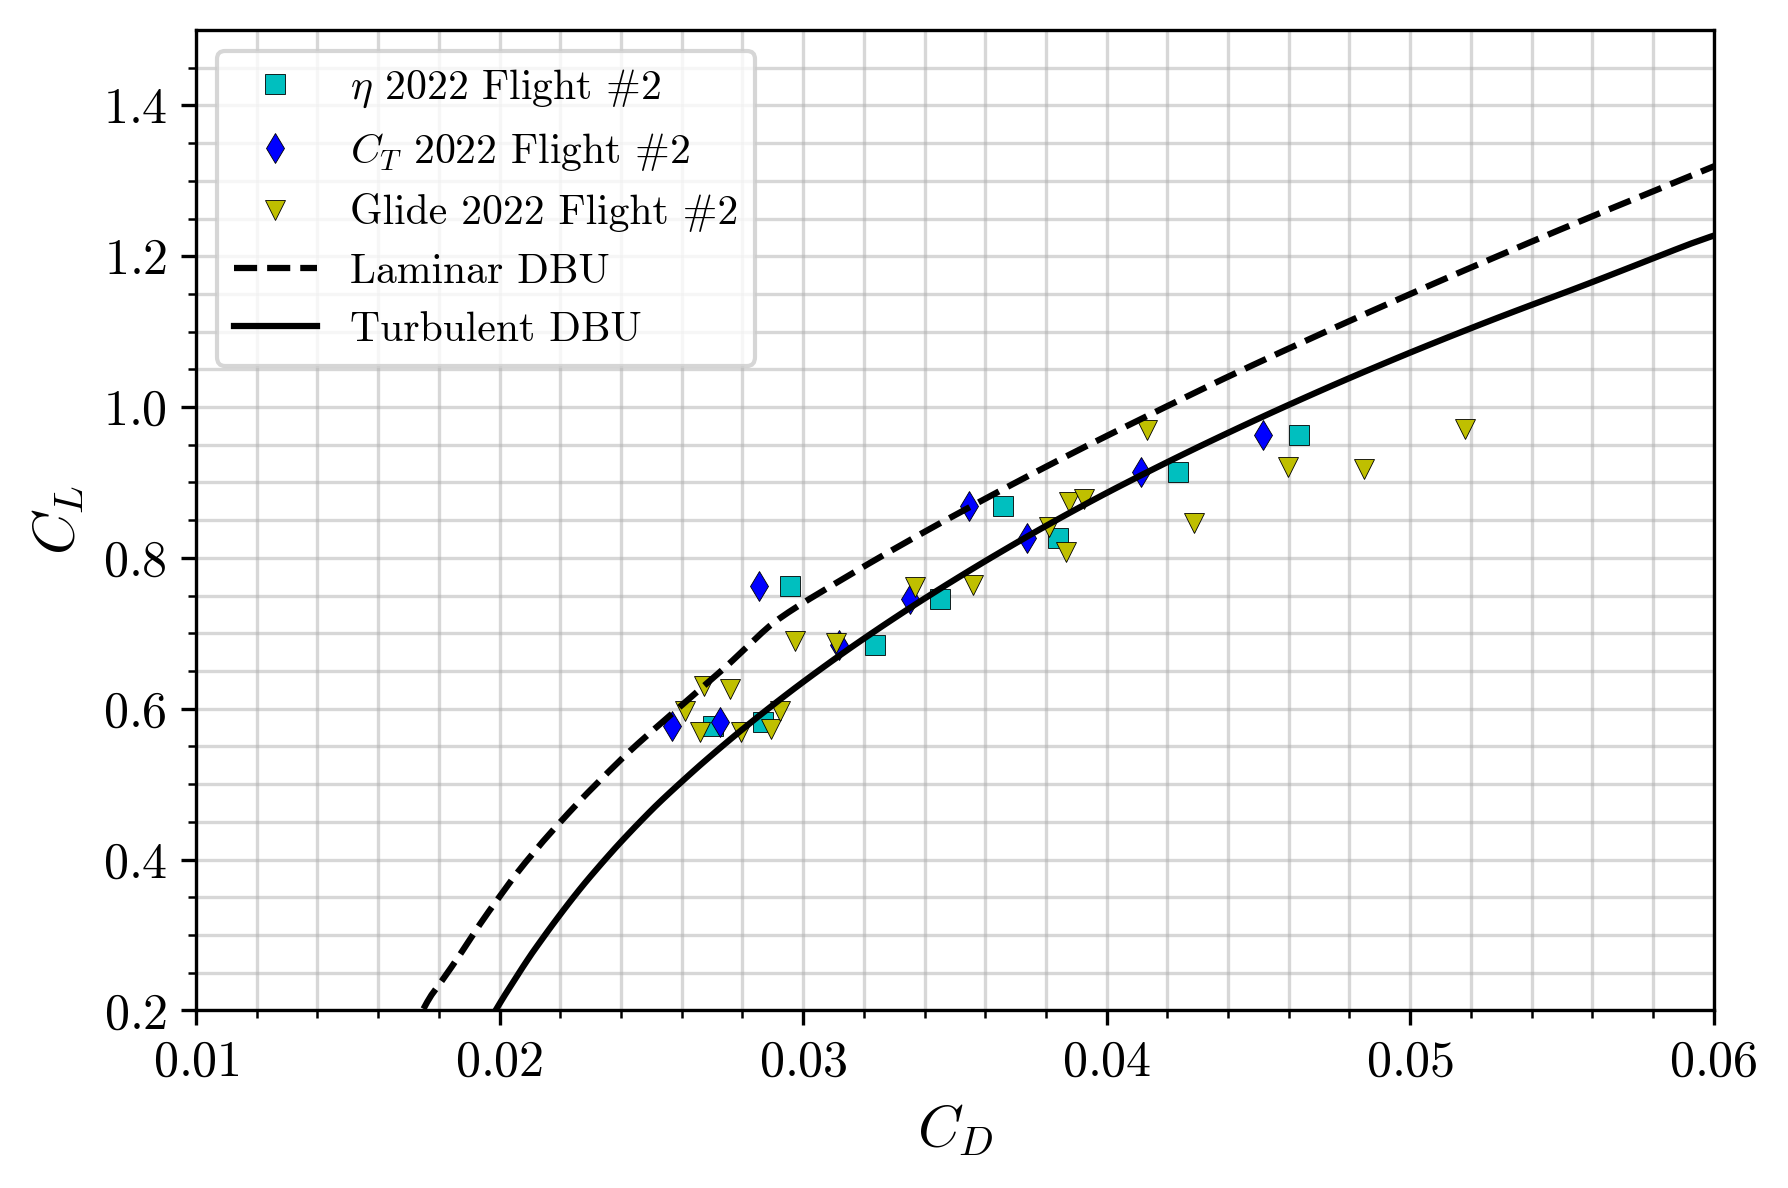

In [58]:
polar_glide_cruise_comparison_raw = plt.figure(dpi=300, figsize=(6,4))

plt.plot(eta_cruise_segresult_2022_06_15.ave_polar.CD, eta_cruise_segresult_2022_06_15.ave_polar.CL, marker='s', markersize=5, color='c', linestyle='', label="$\eta$ 2022 Flight #2")
plt.plot(ct_cruise_segresult_2022_06_15.ave_polar.CD, ct_cruise_segresult_2022_06_15.ave_polar.CL, marker='d', markersize=5, color='b', linestyle='', label="$C_T$ 2022 Flight #2")
plt.plot(glide_segresult_2022.ave_polar.CD, glide_segresult_2022.ave_polar.CL, marker='v', markersize=5, color='y', linestyle='', label="Glide 2022 Flight #2")

plt.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')
plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label='Turbulent DBU')

plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.xlim([0.01, 0.06])
plt.ylim([0.2, 1.5])
plt.show()

# main.save_figure(polar_glide_cruise_comparison_raw, f'{polar_glide_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

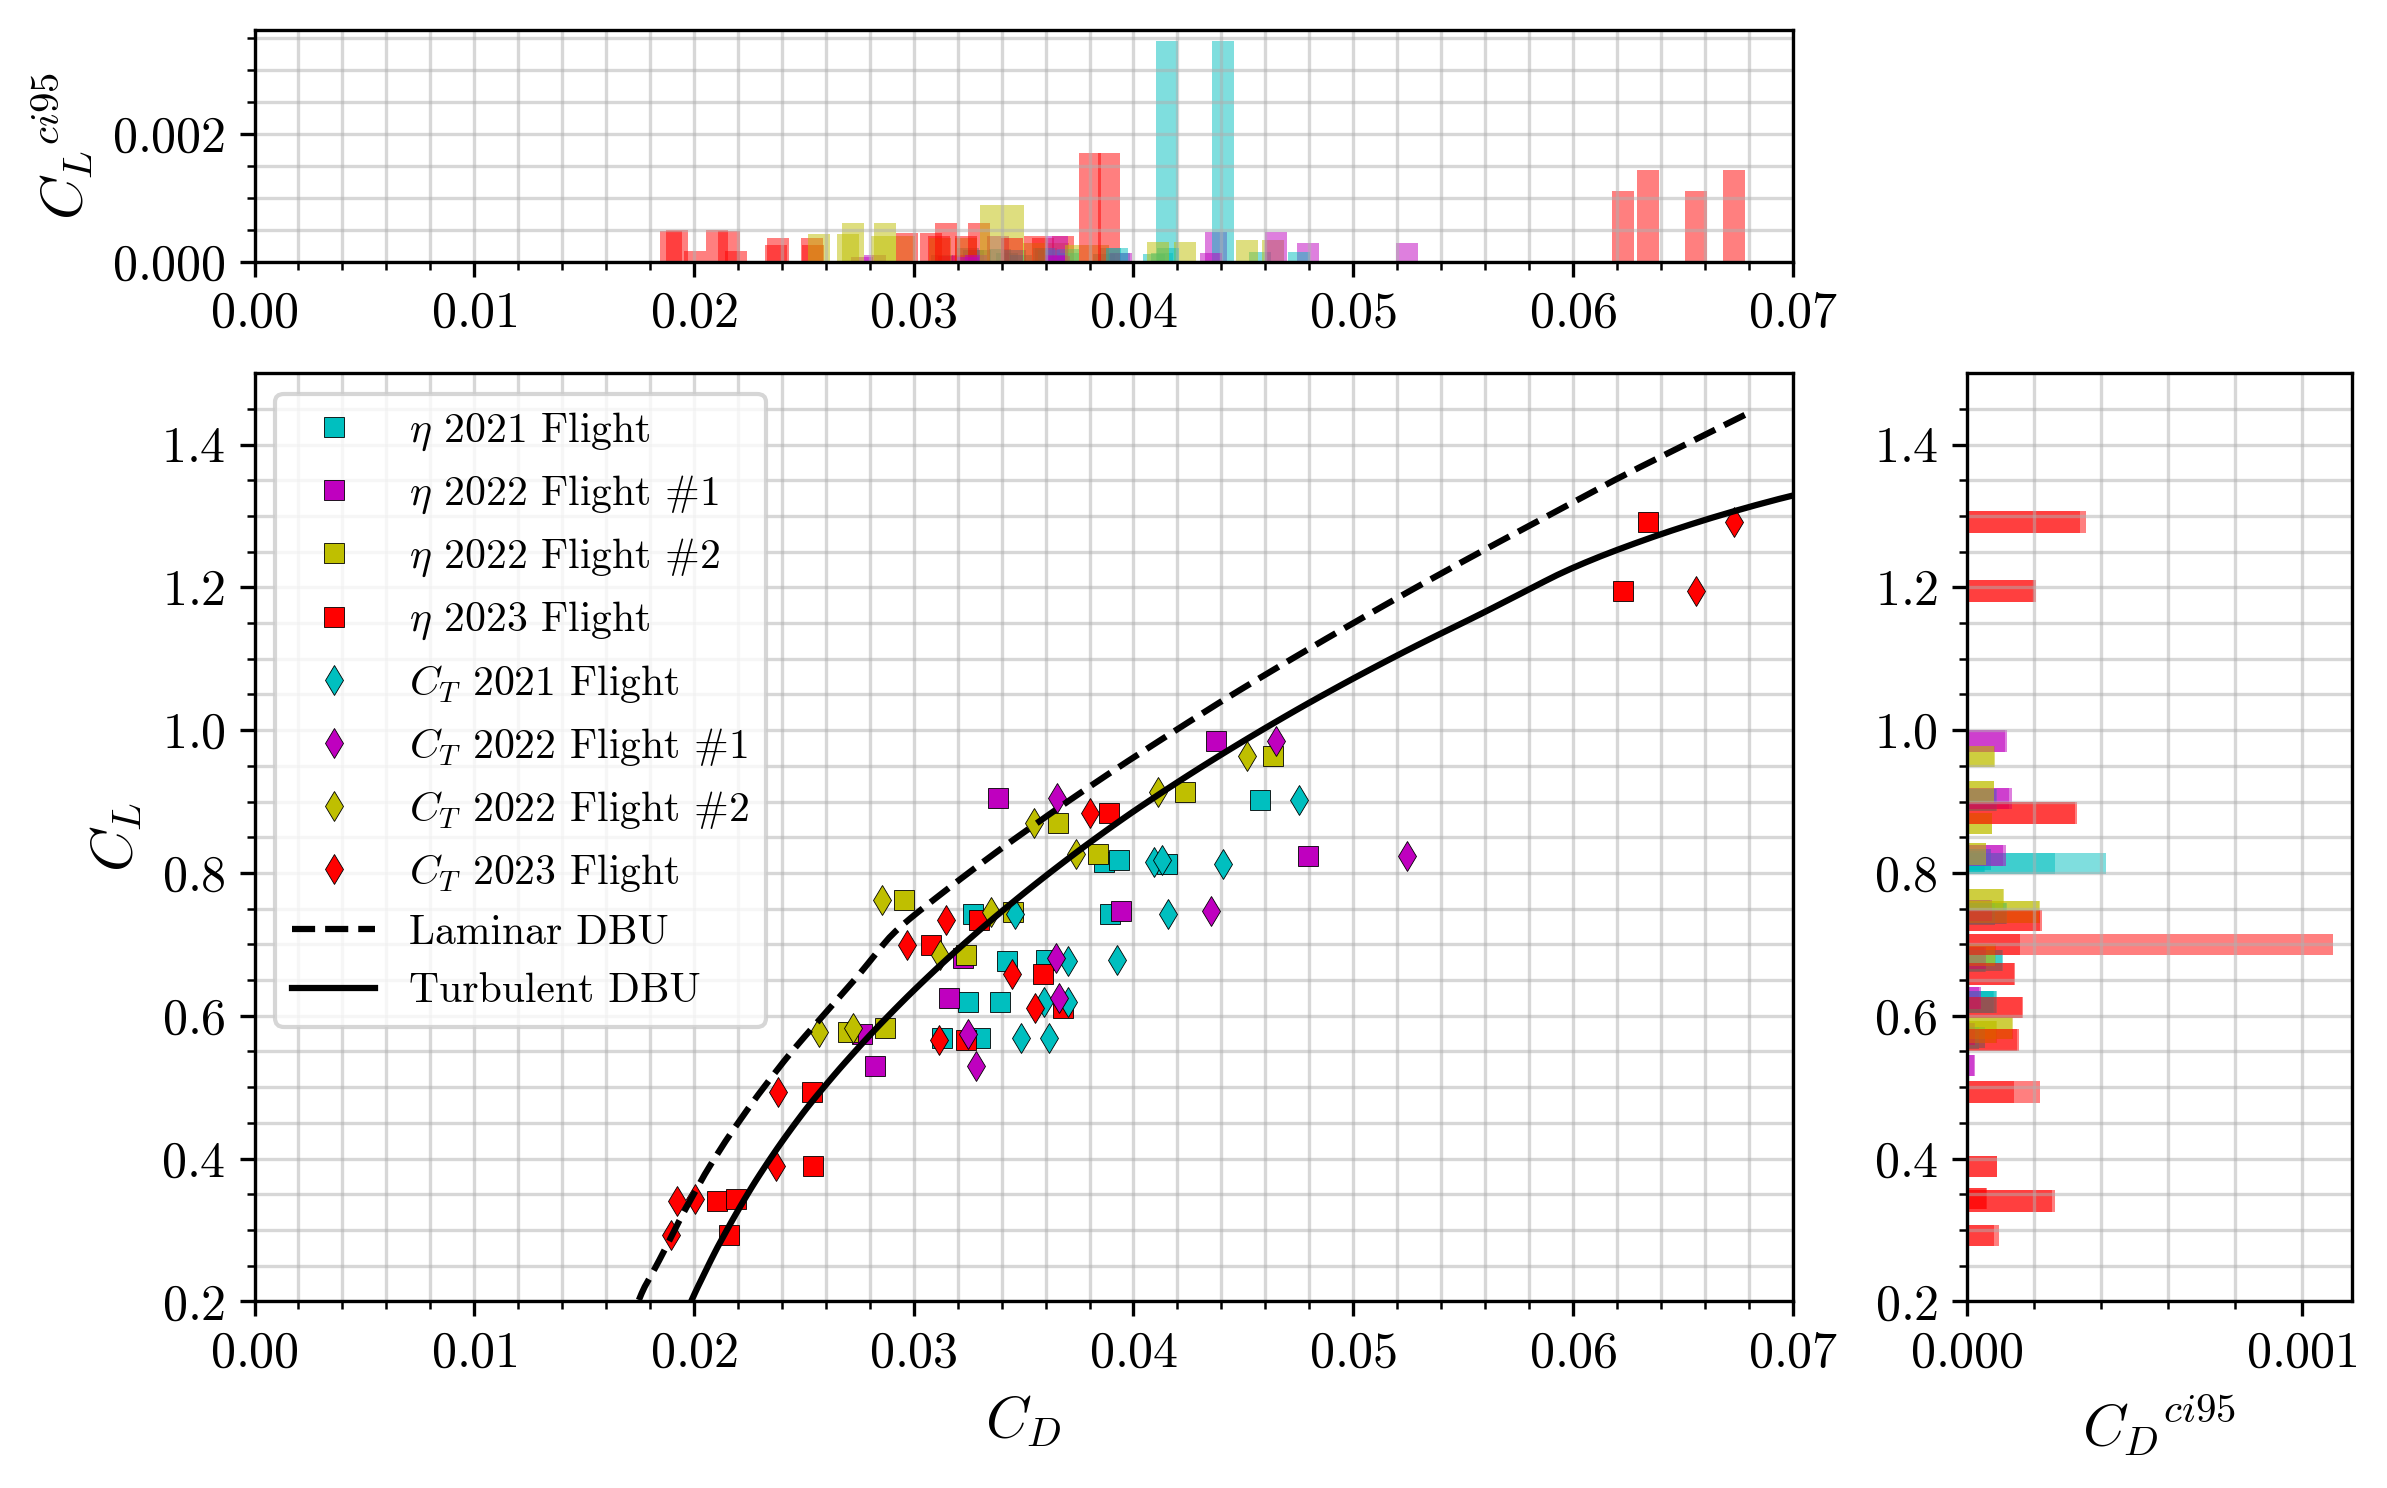

In [59]:
from matplotlib import gridspec

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
BIGGEST_SIZE= 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

polar_cruise_cruise_comparison_raw_std = plt.figure(dpi=300, figsize=(8, 5))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[4,1], height_ratios=[1,4])

ax0 = polar_cruise_cruise_comparison_raw_std.add_subplot(gs[1,1])
ax1 = polar_cruise_cruise_comparison_raw_std.add_subplot(gs[1,0])
ax2 = polar_cruise_cruise_comparison_raw_std.add_subplot(gs[0,0])

heightbar = 0.03

ax0.barh(eta_cruise_segresult_2021.ave_polar.CL, eta_cruise_segresult_2021.ci95_polar.CD, height=heightbar, color='c', align='center', alpha=0.5)
ax0.barh(eta_cruise_segresult_2022_06_13.ave_polar.CL, eta_cruise_segresult_2022_06_13.ci95_polar.CD, height=heightbar, color='m', align='center', alpha=0.5)
ax0.barh(eta_cruise_segresult_2022_06_15.ave_polar.CL, eta_cruise_segresult_2022_06_15.ci95_polar.CD, height=heightbar, color='y', align='center', alpha=0.5)
ax0.barh(eta_cruise_segresult_2023.ave_polar.CL, eta_cruise_segresult_2023.ci95_polar.CD, height=heightbar, color='r', align='center', alpha=0.5)
ax0.barh(ct_cruise_segresult_2021.ave_polar.CL, ct_cruise_segresult_2021.ci95_polar.CD, height=heightbar, color='c', align='center', alpha=0.5)
ax0.barh(ct_cruise_segresult_2022_06_13.ave_polar.CL, ct_cruise_segresult_2022_06_13.ci95_polar.CD, height=heightbar, color='m', align='center', alpha=0.5)
ax0.barh(ct_cruise_segresult_2022_06_15.ave_polar.CL, ct_cruise_segresult_2022_06_15.ci95_polar.CD, height=heightbar, color='y', align='center', alpha=0.5)
ax0.barh(ct_cruise_segresult_2023.ave_polar.CL, ct_cruise_segresult_2023.ci95_polar.CD, height=heightbar, color='r', align='center', alpha=0.5)


ax1.plot(eta_cruise_segresult_2021.ave_polar.CD, eta_cruise_segresult_2021.ave_polar.CL, marker='s', markersize=5, color='c', linestyle='', label="$\eta$ 2021 Flight")
ax1.plot(eta_cruise_segresult_2022_06_13.ave_polar.CD, eta_cruise_segresult_2022_06_13.ave_polar.CL, marker='s', markersize=5, color='m', linestyle='', label="$\eta$ 2022 Flight #1")
ax1.plot(eta_cruise_segresult_2022_06_15.ave_polar.CD, eta_cruise_segresult_2022_06_15.ave_polar.CL, marker='s', markersize=5, color='y', linestyle='', label="$\eta$ 2022 Flight #2")
ax1.plot(eta_cruise_segresult_2023.ave_polar.CD, eta_cruise_segresult_2023.ave_polar.CL, marker='s', markersize=5, color='r', linestyle='', label="$\eta$ 2023 Flight")
ax1.plot(ct_cruise_segresult_2021.ave_polar.CD, ct_cruise_segresult_2021.ave_polar.CL, marker='d', markersize=5, color='c', linestyle='', label="$C_T$ 2021 Flight")
ax1.plot(ct_cruise_segresult_2022_06_13.ave_polar.CD, ct_cruise_segresult_2022_06_13.ave_polar.CL, marker='d', markersize=5, color='m', linestyle='', label="$C_T$ 2022 Flight #1")
ax1.plot(ct_cruise_segresult_2022_06_15.ave_polar.CD, ct_cruise_segresult_2022_06_15.ave_polar.CL, marker='d', markersize=5, color='y', linestyle='', label="$C_T$ 2022 Flight #2")
ax1.plot(ct_cruise_segresult_2023.ave_polar.CD, ct_cruise_segresult_2023.ave_polar.CL, marker='d', markersize=5, color='r', linestyle='', label="$C_T$ 2023 Flight")

ax1.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')
ax1.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label='Turbulent DBU')

widthbar=0.001

ax2.bar(eta_cruise_segresult_2021.ave_polar.CD, eta_cruise_segresult_2021.ci95_polar.CL, width=widthbar, color='c', align='center', alpha=0.5)
ax2.bar(eta_cruise_segresult_2022_06_13.ave_polar.CD, eta_cruise_segresult_2022_06_13.ci95_polar.CL, width=widthbar, color='m', align='center', alpha=0.5)
ax2.bar(eta_cruise_segresult_2022_06_15.ave_polar.CD, eta_cruise_segresult_2022_06_15.ci95_polar.CL, width=widthbar, color='y', align='center', alpha=0.5)

ax2.bar(eta_cruise_segresult_2023.ave_polar.CD, eta_cruise_segresult_2023.ci95_polar.CL, width=widthbar, color='r', align='center', alpha=0.5)
ax2.bar(ct_cruise_segresult_2021.ave_polar.CD, ct_cruise_segresult_2021.ci95_polar.CL, width=widthbar, color='c', align='center', alpha=0.5)
ax2.bar(ct_cruise_segresult_2022_06_13.ave_polar.CD, ct_cruise_segresult_2022_06_13.ci95_polar.CL, width=widthbar, color='m', align='center', alpha=0.5)

ax2.bar(ct_cruise_segresult_2022_06_15.ave_polar.CD, ct_cruise_segresult_2022_06_15.ci95_polar.CL, width=widthbar, color='y', align='center', alpha=0.5)
ax2.bar(ct_cruise_segresult_2023.ave_polar.CD, ct_cruise_segresult_2023.ci95_polar.CL, width=widthbar, color='r', align='center', alpha=0.5)


ax0.set_ylim([0.2, 1.5])
ax0.set_xlabel("${C_D}^{ci95}$")
ax2.set_xlim([0.0, 0.07])
ax2.set_ylabel("${C_L}^{ci95}$")
ax1.set_xlim([0.0, 0.07])
ax1.set_ylim([0.2, 1.5])
ax1.set_xlabel("$C_D$")
ax1.set_ylabel("$C_L$")

ax1.legend(ncol=1, loc='upper left', fancybox=True)

plt.tight_layout()
plt.show()
main.save_figure(polar_cruise_cruise_comparison_raw_std, f'{polar_cruise_cruise_comparison_raw_std=}'.split('=')[0], figure_path, overwrite=True)


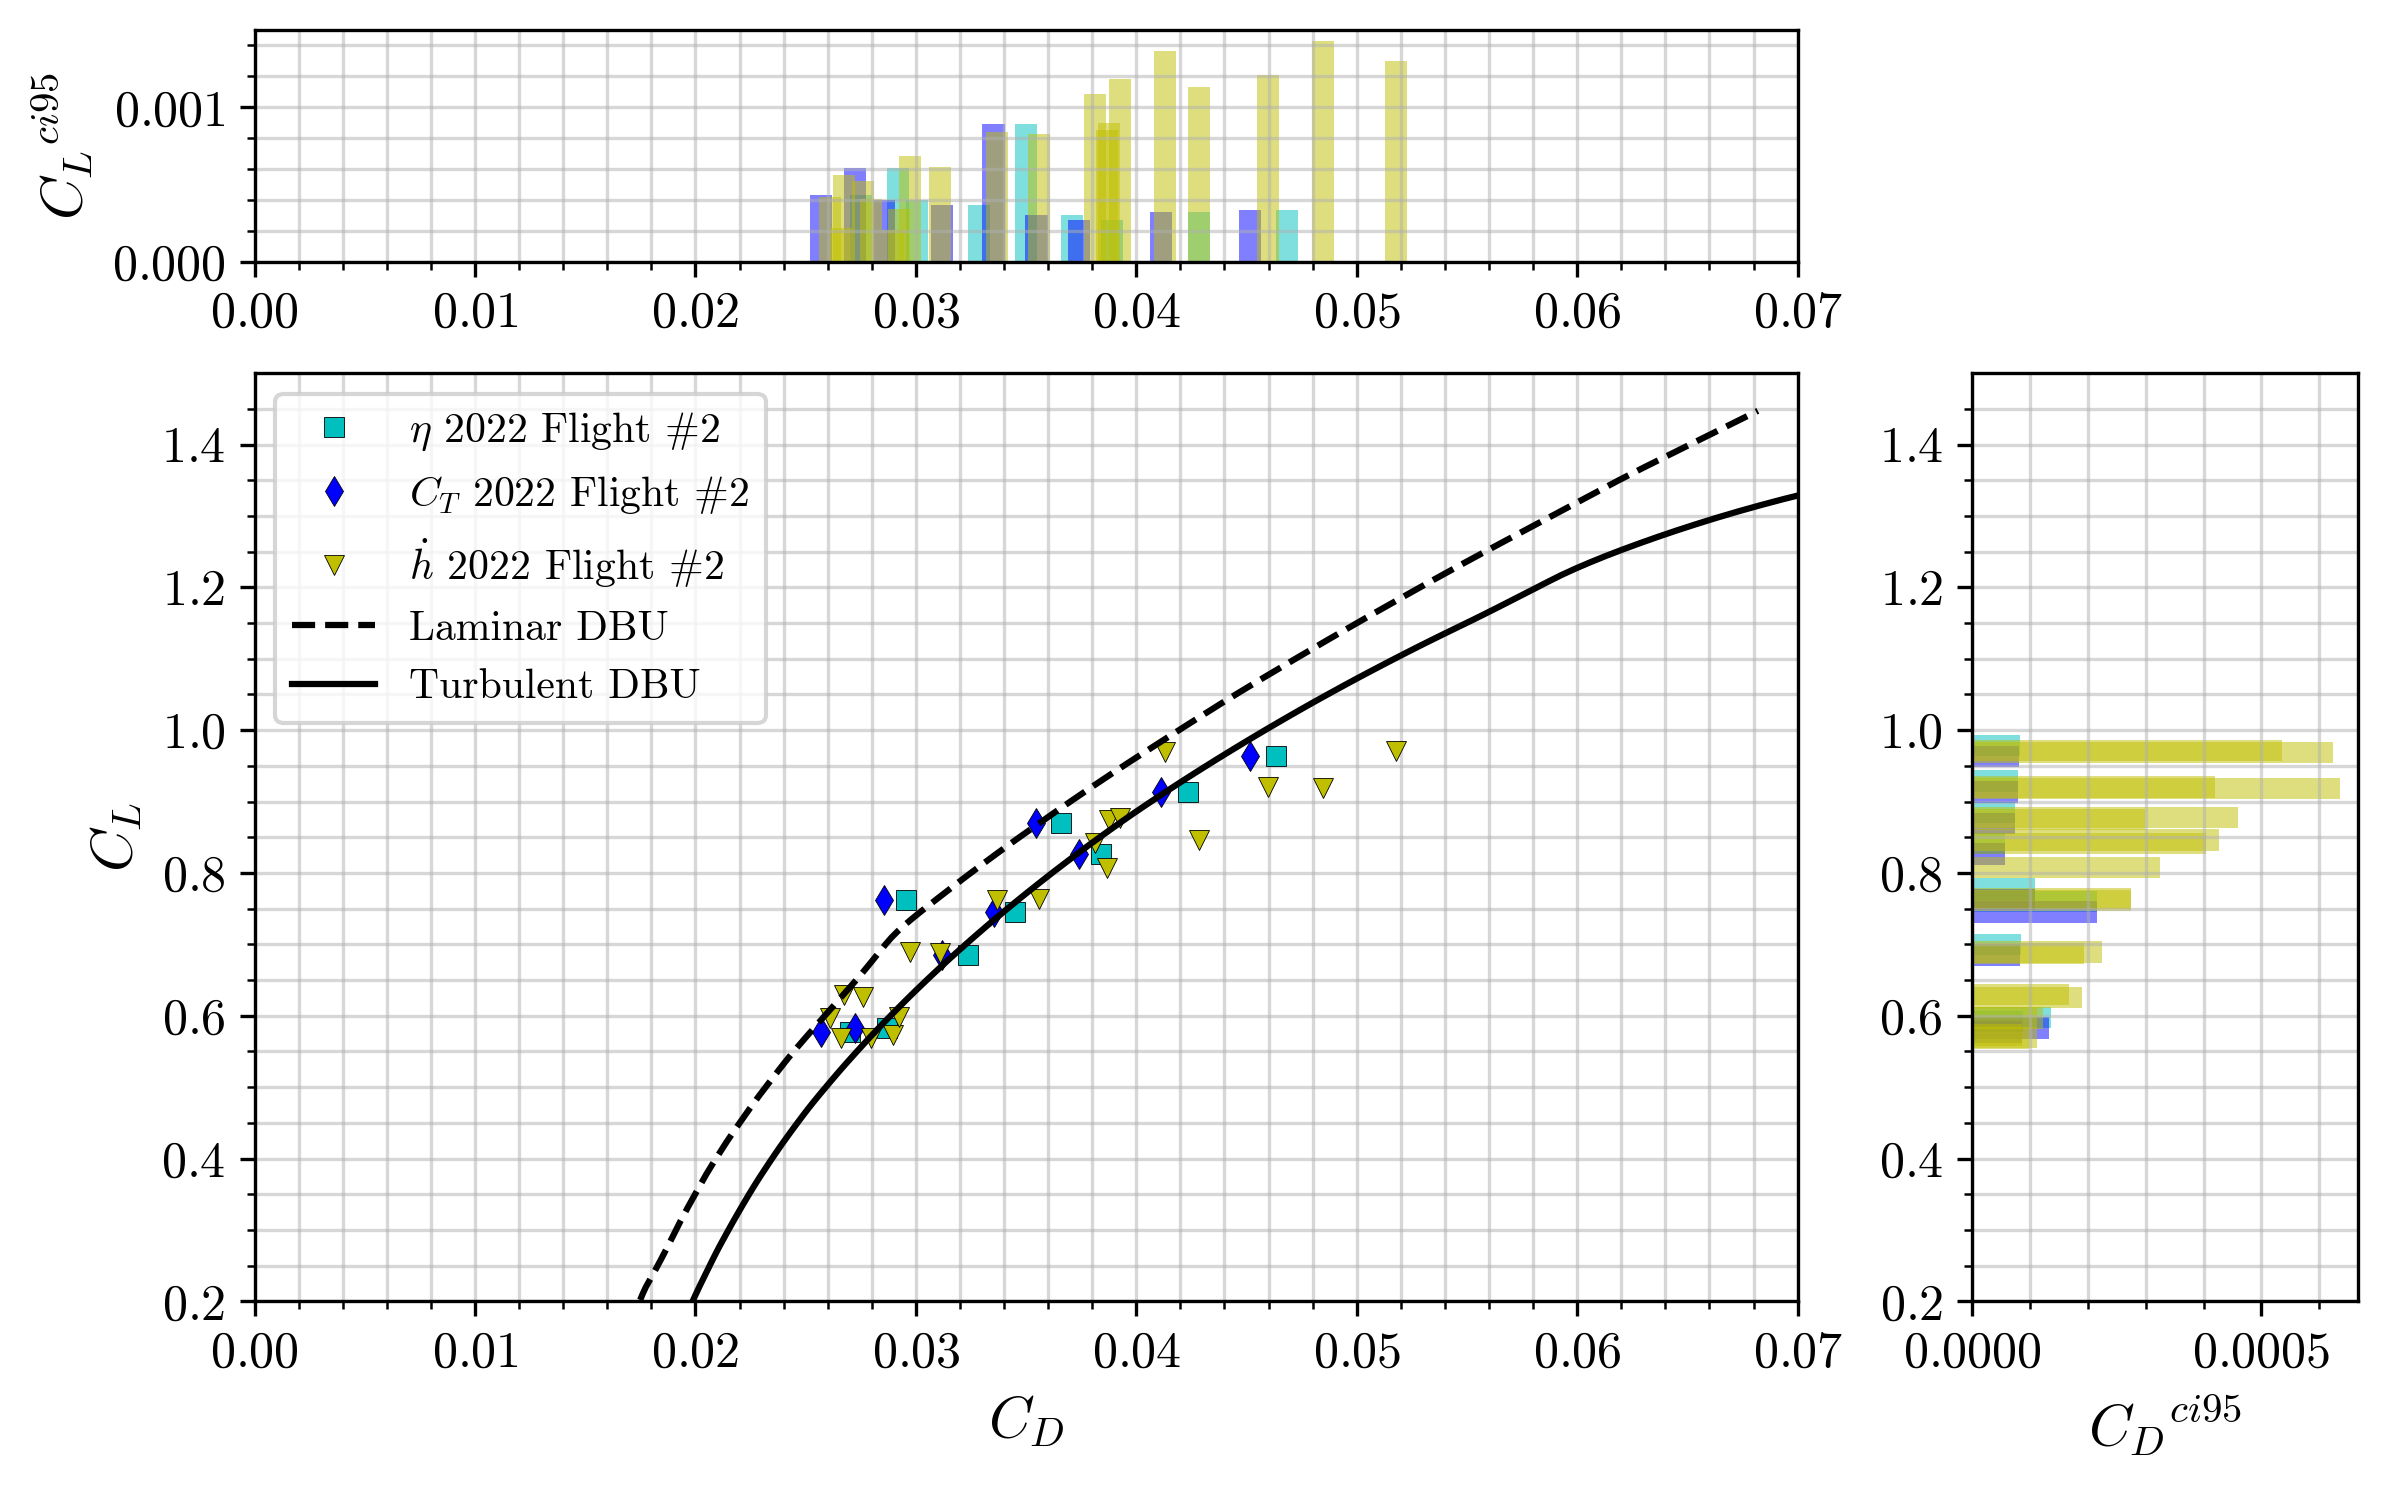

In [60]:
from matplotlib import gridspec
polar_glide_cruise_comparison_raw_std = plt.figure(dpi=300, figsize=(8,5))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[4,1], height_ratios=[1,4])

ax2 = polar_glide_cruise_comparison_raw_std.add_subplot(gs[0,0])
ax1 = polar_glide_cruise_comparison_raw_std.add_subplot(gs[1,0])
ax0 = polar_glide_cruise_comparison_raw_std.add_subplot(gs[1,1])


heightbar = 0.03
# ax0.barh(eta_cruise_segresult_2022_06_15.ave_polar.CL, 100.0*eta_cruise_segresult_2022_06_15.ci95_polar.CD/eta_cruise_segresult_2022_06_15.ave_polar.CD, height=heightbar, color='c', align='edge', alpha=0.5)
# ax0.barh(ct_cruise_segresult_2022_06_15.ave_polar.CL, 100.0*ct_cruise_segresult_2022_06_15.ci95_polar.CD/ct_cruise_segresult_2022_06_15.ave_polar.CD, height=heightbar, color='b', align='center', alpha=0.5)
# ax0.barh(glide_segresult_2022.ave_polar.CL, 100.0*glide_segresult_2022.ci95_polar.CD/glide_segresult_2022.ave_polar.CD, height=heightbar, color='y', align='center', alpha=0.5)
ax0.barh(eta_cruise_segresult_2022_06_15.ave_polar.CL, eta_cruise_segresult_2022_06_15.ci95_polar.CD, height=heightbar, color='c', align='edge', alpha=0.5)
ax0.barh(ct_cruise_segresult_2022_06_15.ave_polar.CL, ct_cruise_segresult_2022_06_15.ci95_polar.CD, height=heightbar, color='b', align='center', alpha=0.5)
ax0.barh(glide_segresult_2022.ave_polar.CL, glide_segresult_2022.ci95_polar.CD, height=heightbar, color='y', align='center', alpha=0.5)

ax0.set_ylim([0.2, 1.5])
# ax0.set_xlim([0, 2])
# ax0.set_ylabel("$C_L$")
ax0.set_xlabel("${C_D}^{ci95}$")


ax1.plot(eta_cruise_segresult_2022_06_15.ave_polar.CD, eta_cruise_segresult_2022_06_15.ave_polar.CL, marker='s', markersize=5, color='c', linestyle='', label="$\eta$ 2022 Flight #2")
ax1.plot(ct_cruise_segresult_2022_06_15.ave_polar.CD, ct_cruise_segresult_2022_06_15.ave_polar.CL, marker='d', markersize=5, color='b', linestyle='', label="$C_T$ 2022 Flight #2")
ax1.plot(glide_segresult_2022.ave_polar.CD, glide_segresult_2022.ave_polar.CL, marker='v', markersize=5, color='y', linestyle='', label="$\dot{h}$ 2022 Flight #2")

ax1.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')
ax1.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label='Turbulent DBU')
ax1.set_xlim([0.00, 0.07])
ax1.set_ylim([0.2, 1.5])
ax1.set_xlabel("$C_D$")
ax1.set_ylabel("$C_L$")

widthbar = 0.001
ax2.bar(eta_cruise_segresult_2022_06_15.ave_polar.CD, eta_cruise_segresult_2022_06_15.ci95_polar.CL, color='c', align='edge', alpha=0.5, width=widthbar)
ax2.bar(ct_cruise_segresult_2022_06_15.ave_polar.CD, ct_cruise_segresult_2022_06_15.ci95_polar.CL, color='b', align='center', alpha=0.5, width=widthbar)
ax2.bar(glide_segresult_2022.ave_polar.CD, glide_segresult_2022.ci95_polar.CL, color='y', align='center', alpha=0.5, width=widthbar)
ax2.set_xlim([0.00, 0.07])
ax2.set_ylabel("${C_L}^{ci95}$")
# ax2.set_xlabel("$C_D$")

ax1.legend(ncol=1, loc='upper left', fancybox=True)

plt.tight_layout()
plt.show()

main.save_figure(polar_glide_cruise_comparison_raw_std, f'{polar_glide_cruise_comparison_raw_std=}'.split('=')[0], figure_path, overwrite=True)

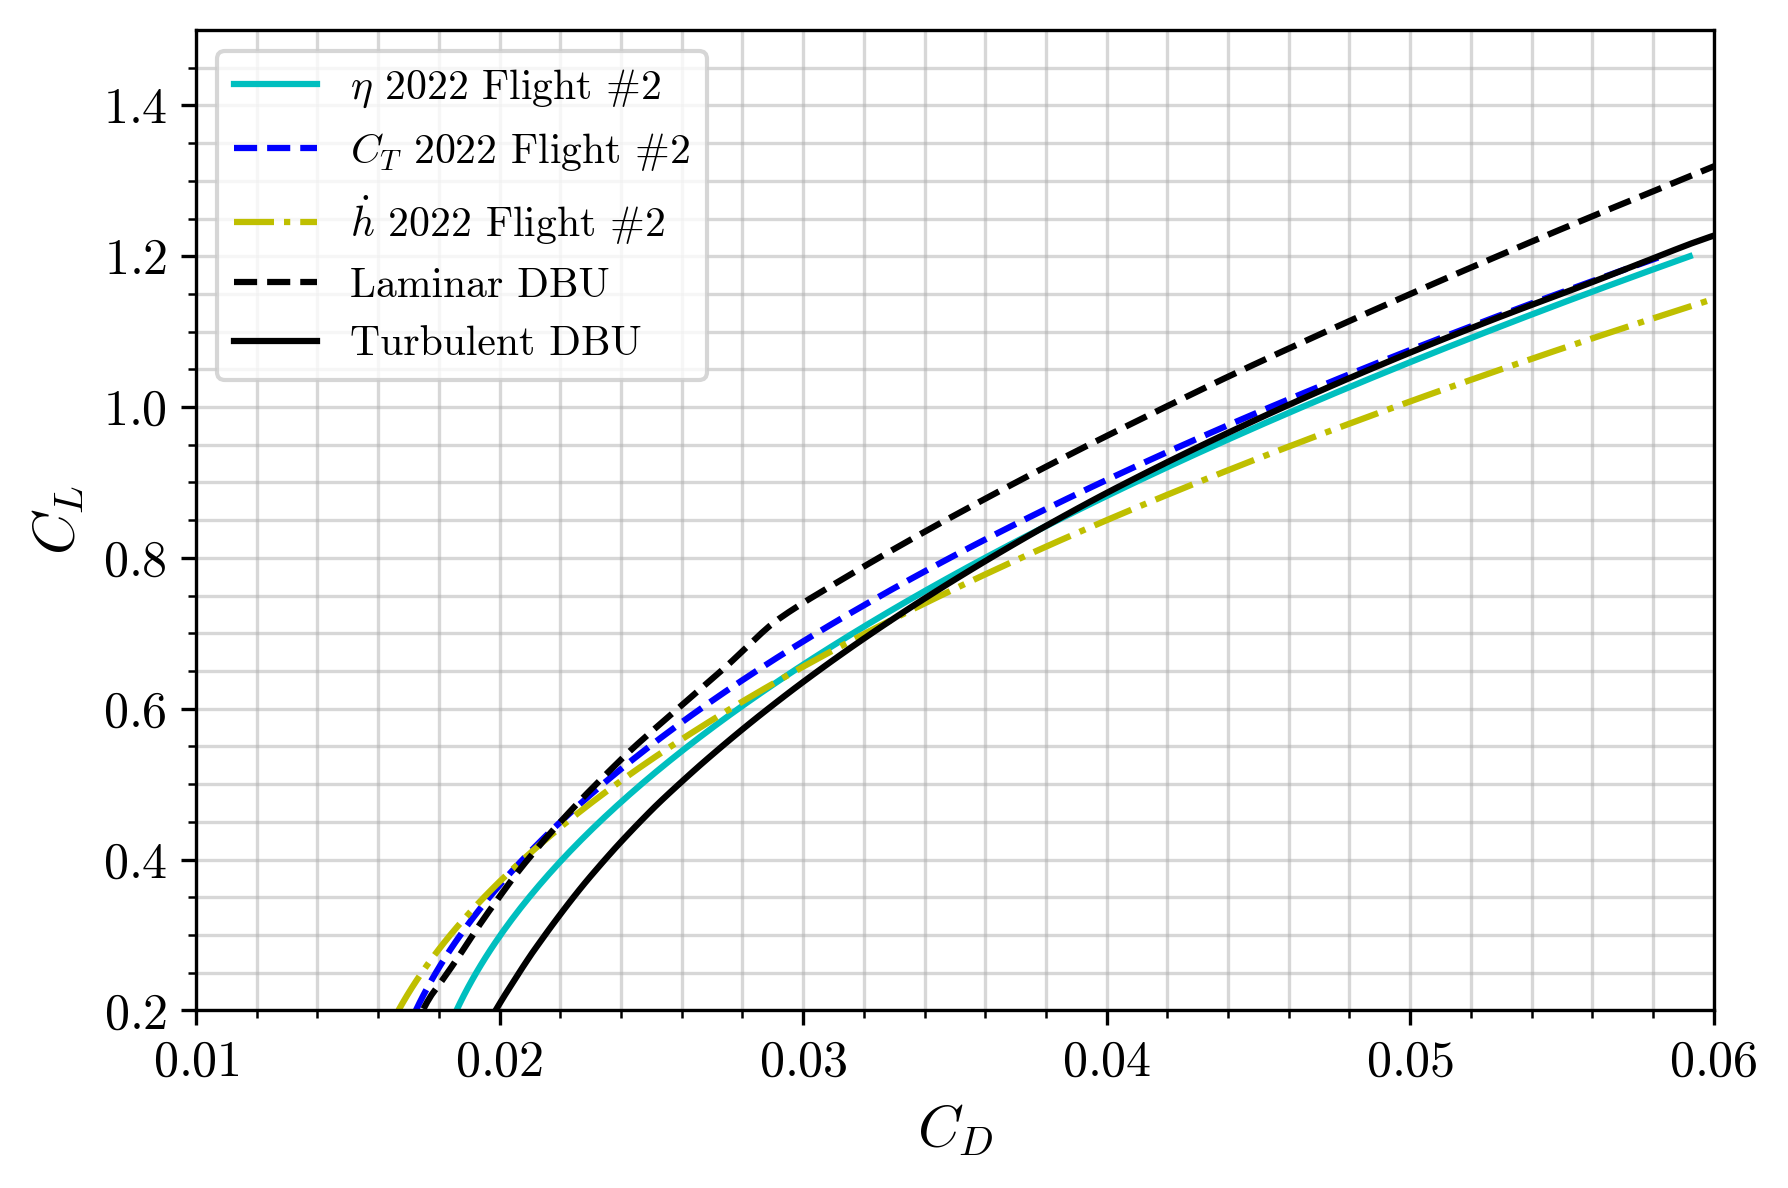

In [61]:
polar_glide_cruise_comparison_fit = plt.figure(dpi=300, figsize=(6,4))


plt.plot(cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='c', linestyle='solid', label="$\eta$ 2022 Flight #2")
plt.plot(cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='b', linestyle='dashed', label="$C_T$ 2022 Flight #2")
plt.plot(cl_finders.plotfittedpolar(createv, glide_segresult_2022.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, glide_segresult_2022.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='y', linestyle='-.', label="$\dot{h}$ 2022 Flight #2")

plt.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')
plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label='Turbulent DBU')

plt.legend(ncol=1, loc='upper left')
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.xlim([0.01, 0.06])
plt.ylim([0.2, 1.5])
plt.show()
main.save_figure(polar_glide_cruise_comparison_fit, f'{polar_glide_cruise_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

In [62]:
glide_segresult_2022.fit_polar

array([0.01529947, 0.58561172])

0.8132420319247816
[0.01686866 0.80699438]
0.8212356028864357
[0.01867136 0.71998802]


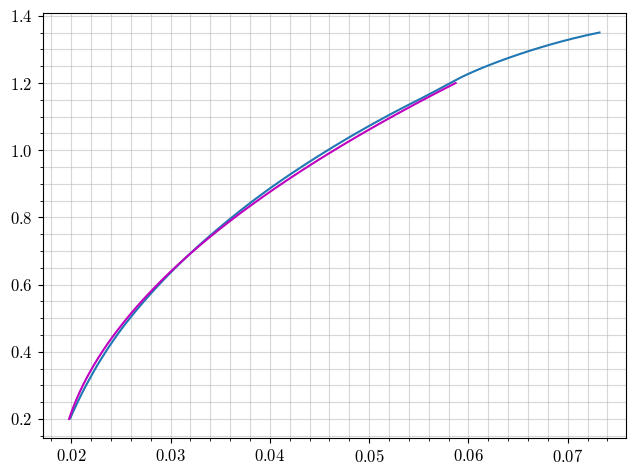

In [63]:
# Printing Drag Build Polar Results
polar = cl_finders.cd2polar(createv, build_laminar.CD, build_laminar.CL)
print(polar)

polar = cl_finders.cd2polar(createv, build_turbulent.CD, build_turbulent.CL)
print(polar)

[CL_bdu_fitted, CD_bdu_fitted] = cl_finders.plotfittedpolar(createv, polar, [0.2,1.2])

plt.figure()
plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle='-', marker='')
plt.plot(CD_bdu_fitted, CL_bdu_fitted, linestyle='-', marker='', color='m')

In [64]:
# Printing Polar Fit Results

print(eta_cruise_segresult_2021.fit_polar[1])
print(ct_cruise_segresult_2021.fit_polar[1])

print(eta_cruise_segresult_2022_06_13.fit_polar[1])
print(ct_cruise_segresult_2022_06_13.fit_polar[1])

print(eta_cruise_segresult_2022_06_15.fit_polar[1])
print(ct_cruise_segresult_2022_06_15.fit_polar[1])

print(eta_cruise_segresult_2023.fit_polar[1])
print(ct_cruise_segresult_2023.fit_polar[1])

0.793729266909524
0.9211813448661712
0.9038988412967647
1.0583466955218859
0.6898190577052823
0.6827479824110037
0.7378787799250115
0.6461644719153775


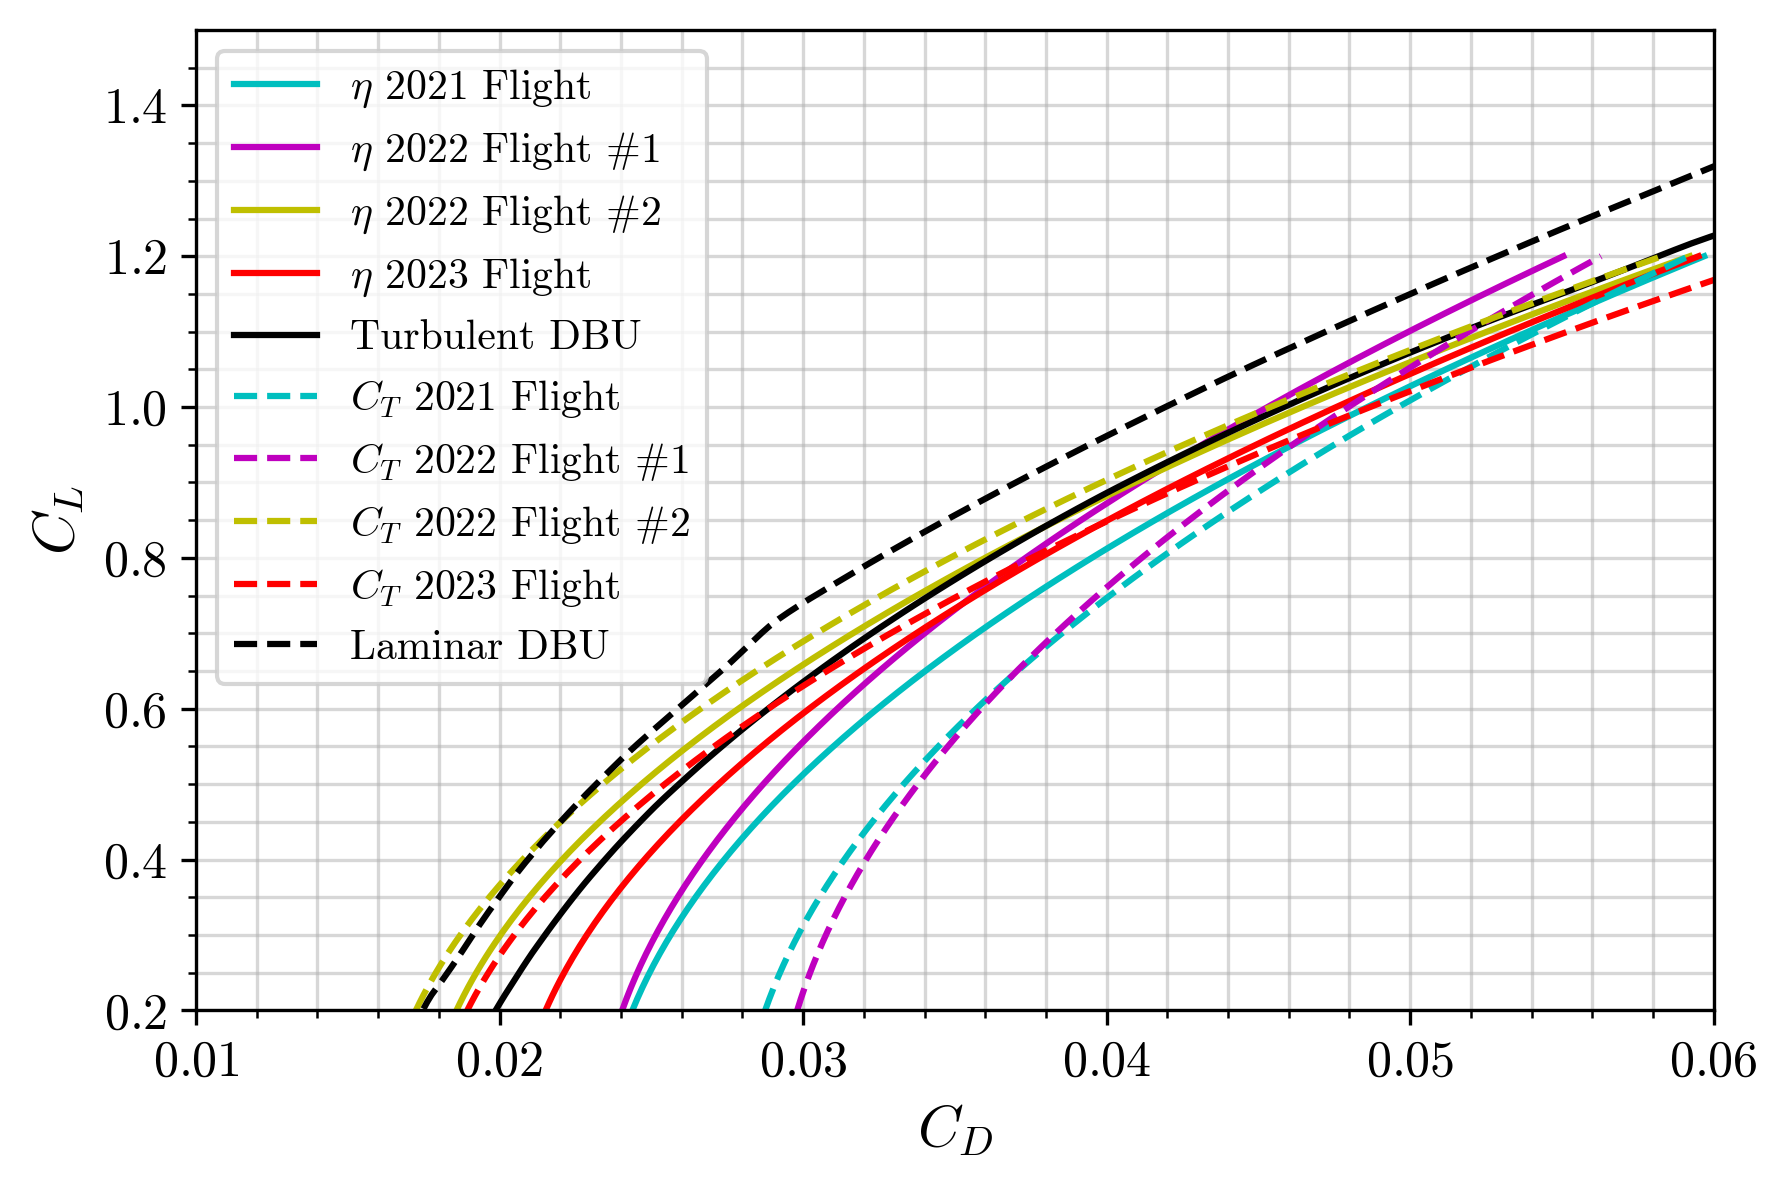

In [65]:
# Cruise Fitted Results
polar_cruise_comparison_fit = plt.figure(dpi=300, figsize=(6,4))

plt.plot(cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2021.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2021.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='c', linestyle='solid', label="$\eta$ 2021 Flight")

plt.plot(cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2022_06_13.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2022_06_13.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='m', linestyle='solid', label="$\eta$ 2022 Flight #1")

plt.plot(cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='y', linestyle='solid', label="$\eta$ 2022 Flight #2")

plt.plot(cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2023.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, eta_cruise_segresult_2023.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='r', linestyle='solid', label="$\eta$ 2023 Flight")

plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label='Turbulent DBU')

plt.plot(cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2021.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2021.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='c', linestyle='dashed', label="$C_T$ 2021 Flight")

plt.plot(cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2022_06_13.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2022_06_13.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='m', linestyle='dashed', label="$C_T$ 2022 Flight #1")

plt.plot(cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2022_06_15.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='y', linestyle='dashed', label="$C_T$ 2022 Flight #2")

plt.plot(cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2023.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, ct_cruise_segresult_2023.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='r', linestyle='dashed', label="$C_T$ 2023 Flight")

plt.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')

plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.xlim([0.01, 0.06])
plt.ylim([0.2, 1.5])
plt.show()
main.save_figure(polar_cruise_comparison_fit, f'{polar_cruise_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

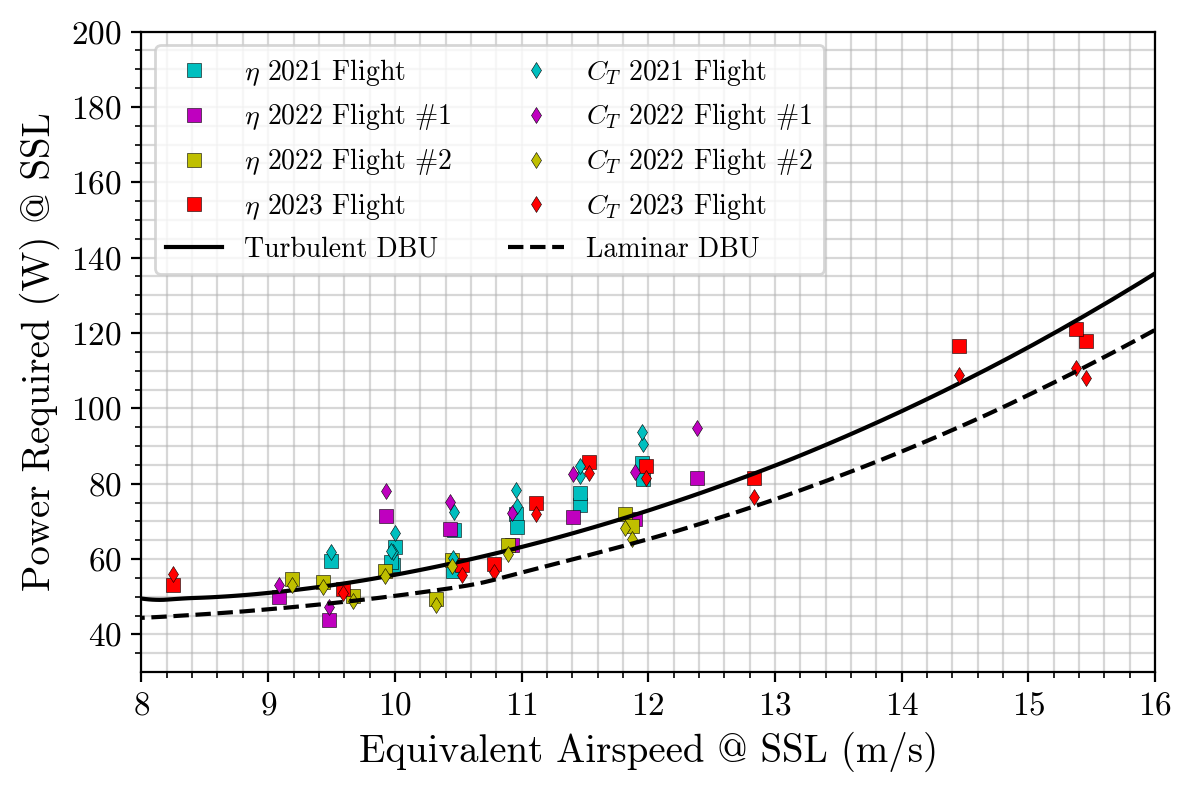

In [66]:
# Getting Power Required from CL, CD
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2021.ave_polar.CL , eta_cruise_segresult_2021.ave_polar.CD)
plt.plot(EAS, Preq, marker='s', markersize=5, color='c', linestyle='', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_13.ave_polar.CL , eta_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(EAS, Preq, marker='s', markersize=5, color='m', linestyle='', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, Preq, marker='s', markersize=5, color='y', linestyle='', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2023.ave_polar.CL , eta_cruise_segresult_2023.ave_polar.CD)
plt.plot(EAS, Preq, marker='s', markersize=5, color='r', linestyle='', label="$\eta$ 2023 Flight")

plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='solid', color='black', marker='', label='Turbulent DBU')

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2021.ave_polar.CL , ct_cruise_segresult_2021.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='d', color='c', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_13.ave_polar.CL , ct_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='d', color='m', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2023.ave_polar.CL , ct_cruise_segresult_2023.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='d', color='r', label="$C_T$ 2023 Flight")

plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='--', color='black', marker='', label='Laminar DBU')

plt.xlim([8, 16])
plt.ylim([30, 200])
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W) @ SSL")
plt.legend(ncol=2, loc='upper left', fancybox=True)
plt.show()
main.save_figure(preq_cruise_comparison_raw, f'{preq_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

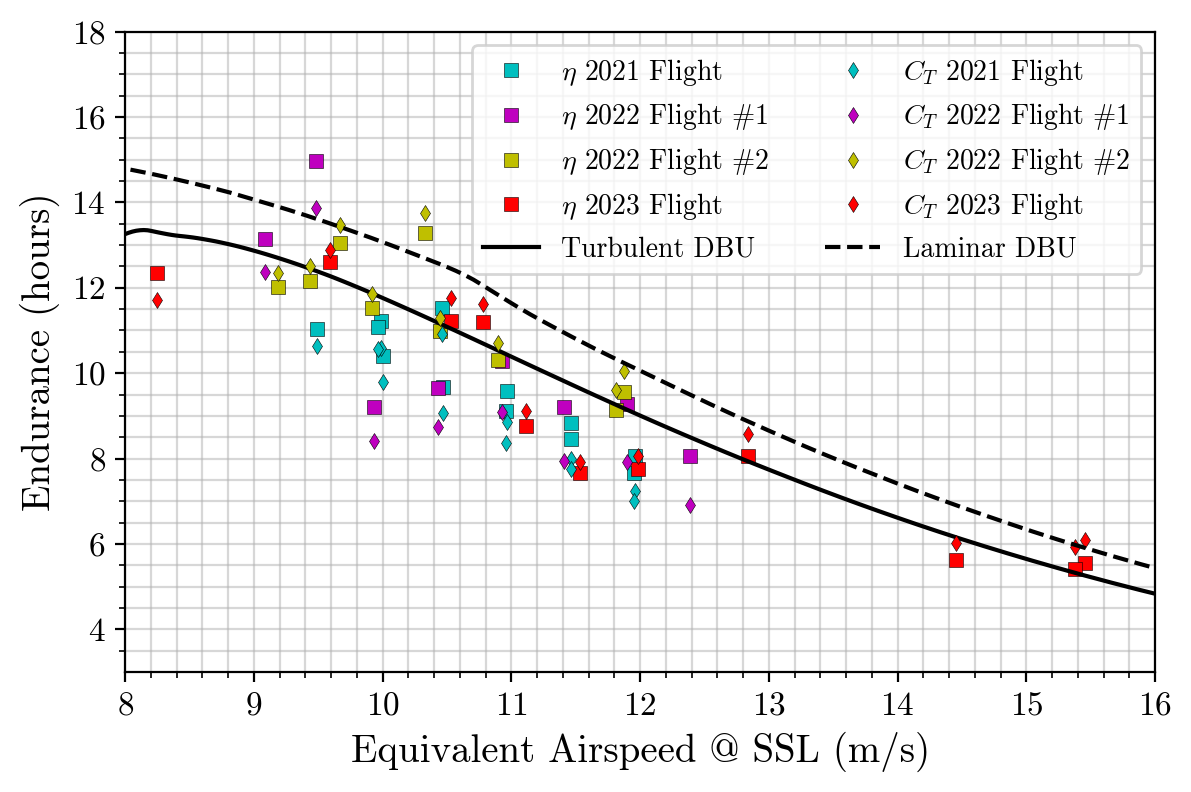

In [67]:
# Calculating Endurance for Raw Cruise

P_total = 1132 # Wh
efficiency= 0.58

# Getting Power Required from CL, CD
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
end_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2021.ave_polar.CL , eta_cruise_segresult_2021.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='s', markersize=5, color='c', linestyle='', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_13.ave_polar.CL , eta_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='s', markersize=5, color='m', linestyle='', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='s', markersize=5, color='y', linestyle='', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2023.ave_polar.CL , eta_cruise_segresult_2023.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='s', markersize=5, color='r', linestyle='', label="$\eta$ 2023 Flight")

plt.plot(EAS_XFLR5_Turbulent, P_total/(Preq_XFLR5_Turbulent/efficiency), linestyle='solid', color='black', marker='', label='Turbulent DBU')

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2021.ave_polar.CL , ct_cruise_segresult_2021.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='', marker='d', color='c', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_13.ave_polar.CL , ct_cruise_segresult_2022_06_13.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='', marker='d', color='m', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2023.ave_polar.CL , ct_cruise_segresult_2023.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='', marker='d', color='r', label="$C_T$ 2023 Flight")

plt.plot(EAS_XFLR5_Laminar, P_total/(Preq_XFLR5_Laminar/efficiency), linestyle='--', color='black', marker='', label='Laminar DBU')

plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Endurance (hours)")
plt.legend(ncol=2, loc='upper right', fancybox=True)
plt.xlim([8,16])
plt.ylim([3,18])
plt.show()
main.save_figure(end_cruise_comparison_raw, f'{end_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

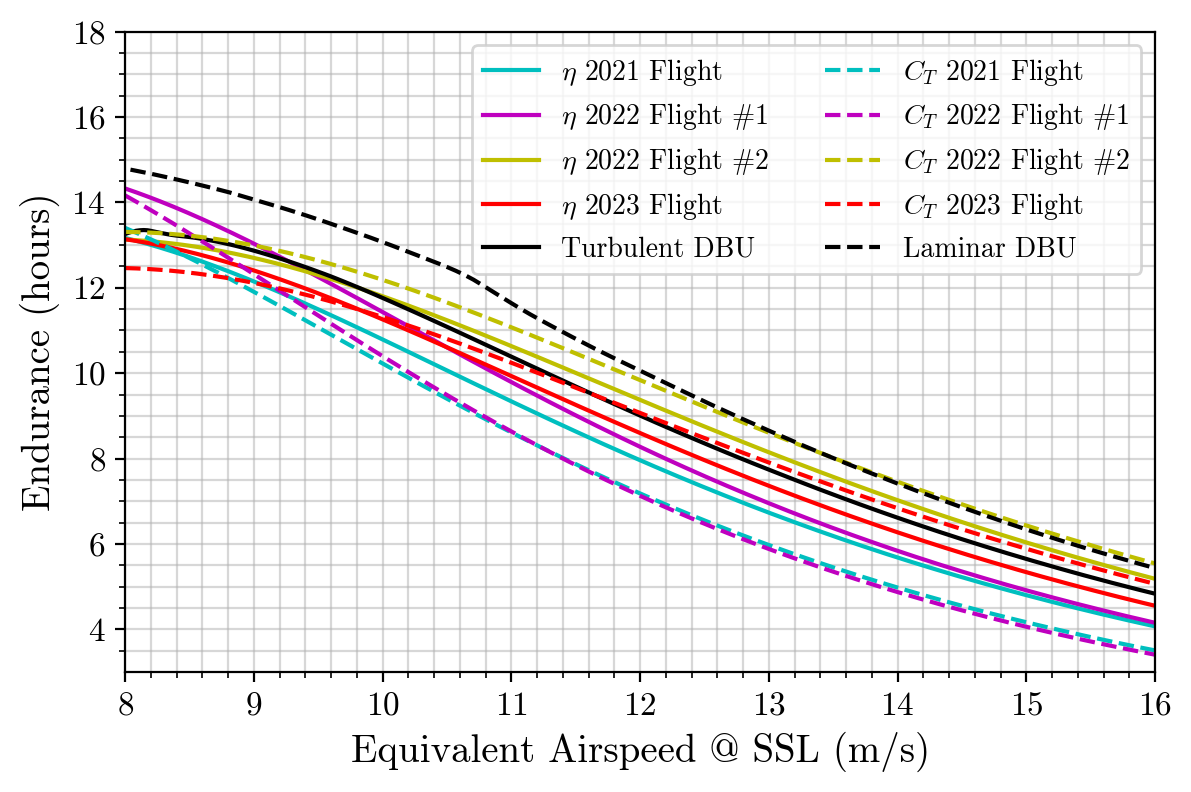

In [68]:
# Getting Power Required from Polars
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
end_cruise_comparison_fit = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2021.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='c', linestyle='solid', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2022_06_13.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='m', linestyle='solid', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='y', linestyle='solid', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2023.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='r', linestyle='solid', label="$\eta$ 2023 Flight")

plt.plot(EAS_XFLR5_Turbulent, P_total/(Preq_XFLR5_Turbulent/efficiency), linestyle='solid', color='black', marker='', label='Turbulent DBU')

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2021.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='c', linestyle='--', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2022_06_13.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='m', linestyle='--', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='y', linestyle='--', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2023.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='r', linestyle='--', label="$C_T$ 2023 Flight")

plt.plot(EAS_XFLR5_Laminar, P_total/(Preq_XFLR5_Laminar/efficiency), linestyle='--', color='black', marker='', label='Laminar DBU')

plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Endurance (hours)")
plt.legend(ncol=2, loc='best', fancybox=True)
plt.xlim([8,16])
plt.ylim([3,18])
plt.show()
main.save_figure(end_cruise_comparison_fit, f'{end_cruise_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

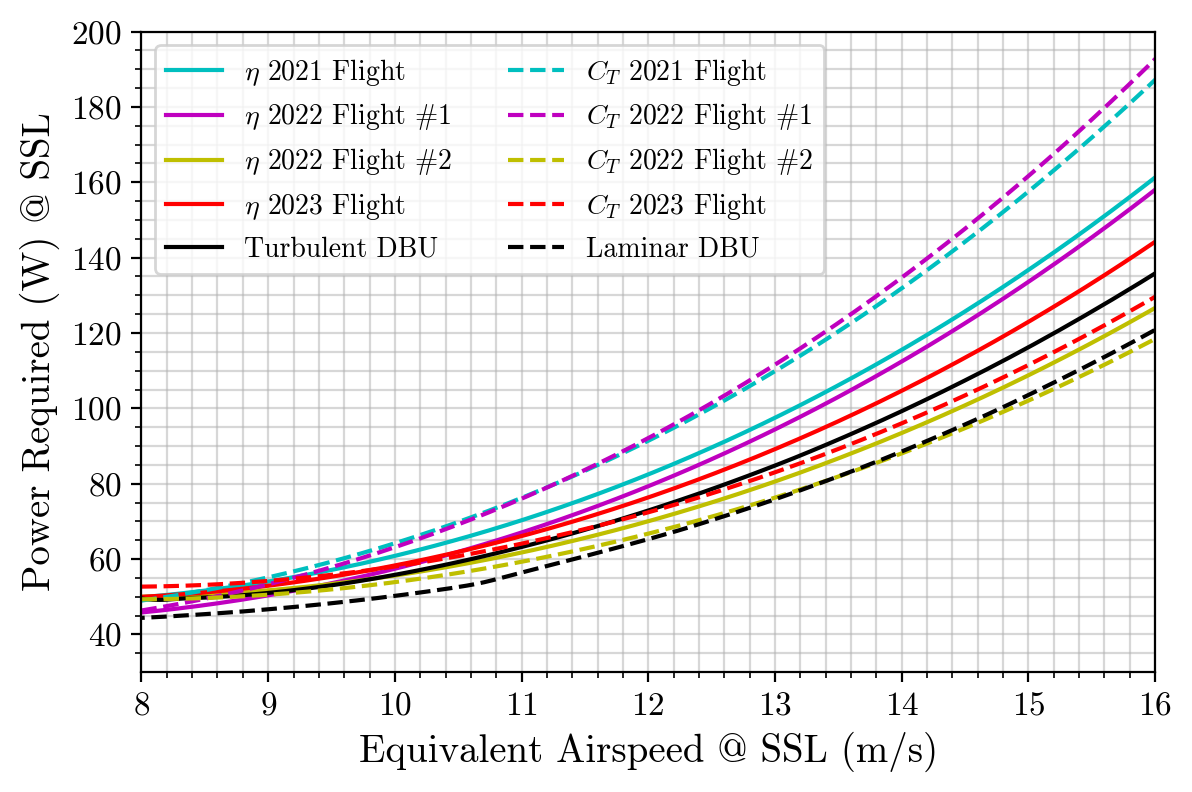

In [69]:
# Getting Power Required from Polars
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_cruise_comparison_fit = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2021.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='c', linestyle='solid', label="$\eta$ 2021 Flight")

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2022_06_13.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='m', linestyle='solid', label="$\eta$ 2022 Flight #1")

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='y', linestyle='solid', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2023.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='r', linestyle='solid', label="$\eta$ 2023 Flight")

plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='solid', color='black', marker='', label='Turbulent DBU')

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2021.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='c', linestyle='--', label="$C_T$ 2021 Flight")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2022_06_13.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='m', linestyle='--', label="$C_T$ 2022 Flight #1")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='y', linestyle='--', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2023.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='r', linestyle='--', label="$C_T$ 2023 Flight")

plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='--', color='black', marker='', label='Laminar DBU')

plt.xlim([8, 16])
plt.ylim([30, 200])
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W) @ SSL")
plt.legend(ncol=2, loc='upper left', fancybox=True)
plt.show()
main.save_figure(preq_cruise_comparison_fit, f'{preq_cruise_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

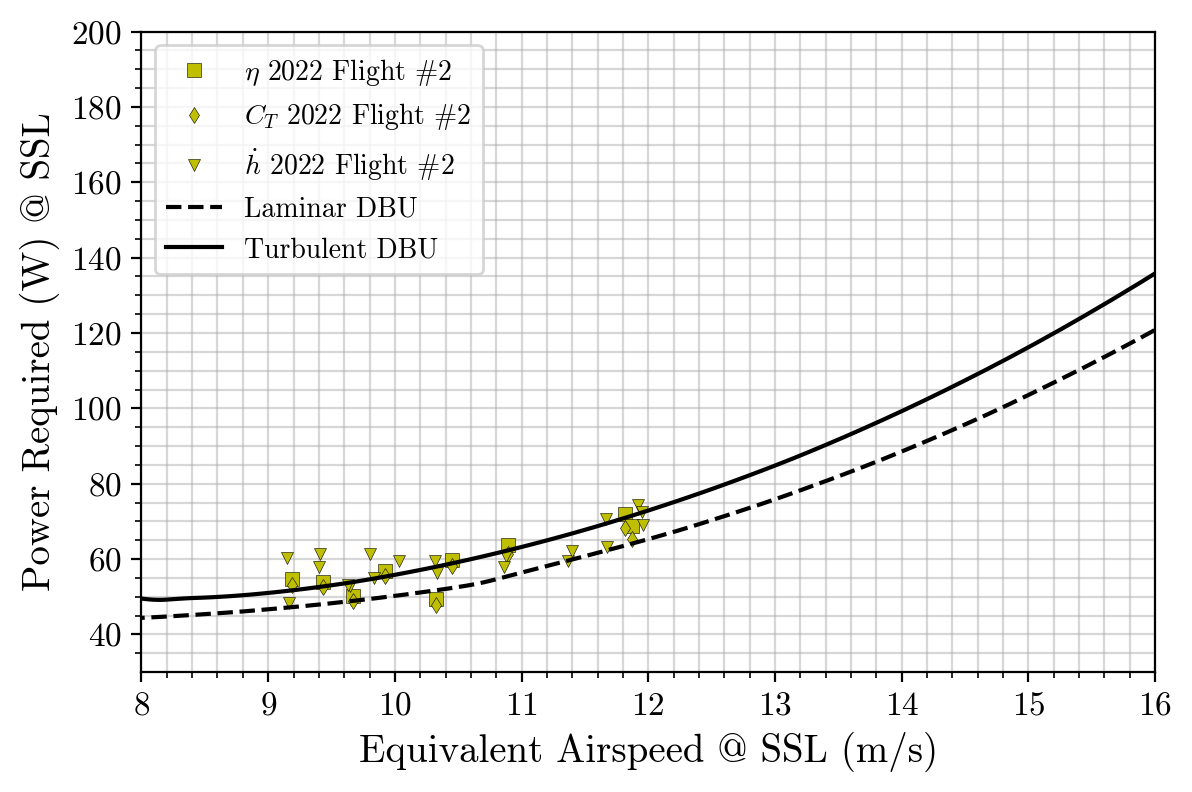

In [70]:
preq_glide_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, Preq, marker='s', markersize=5, color='y', linestyle='', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, glide_segresult_2022.ave_polar.CL , glide_segresult_2022.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='', marker='v', color='y', label="$\dot{h}$ 2022 Flight #2")

plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='--', color='black', marker='', label='Laminar DBU')
plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='solid', color='black', marker='', label='Turbulent DBU')

plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W) @ SSL")
plt.xlim([8, 16])
plt.ylim([30, 200])
plt.show()

main.save_figure(preq_glide_cruise_comparison_raw, f'{preq_glide_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

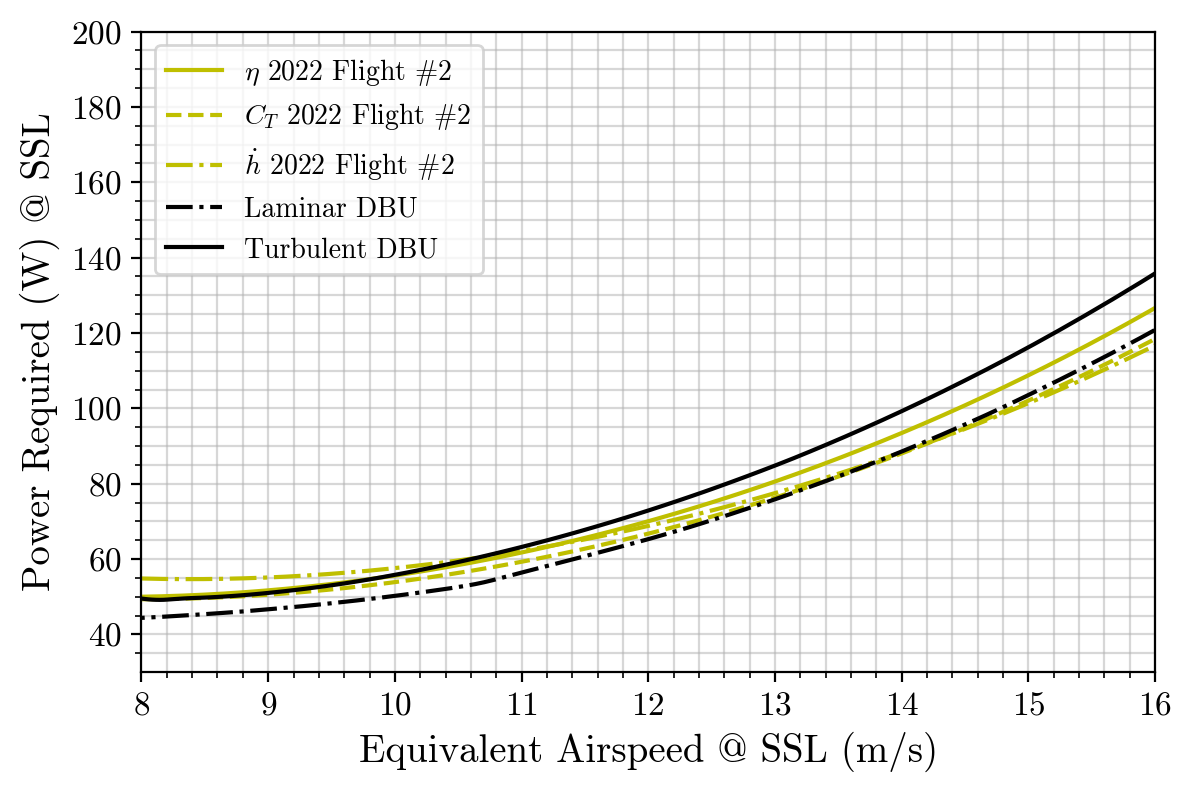

In [71]:
# Getting Power Required from Polars
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_cruise_glide_comparison_fit = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='y', linestyle='solid', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='y', linestyle='--', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, glide_segresult_2022.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='y', linestyle='-.', label="$\dot{h}$ 2022 Flight #2")

plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='-.', color='black', marker='', label='Laminar DBU')
plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='solid', color='black', marker='', label='Turbulent DBU')

plt.xlim([8, 16])
plt.ylim([30, 200])
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W) @ SSL")
plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.show()
main.save_figure(preq_cruise_glide_comparison_fit, f'{preq_cruise_glide_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

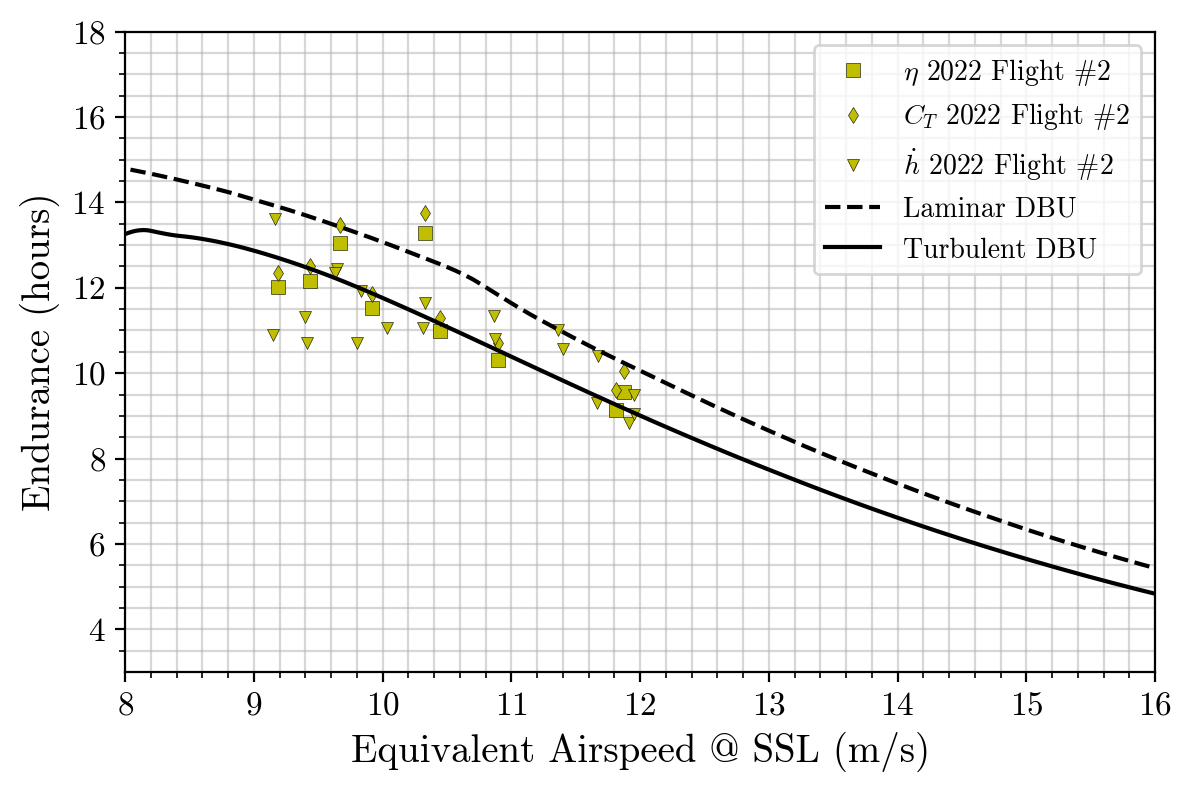

In [72]:
end_glide_cruise_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, eta_cruise_segresult_2022_06_15.ave_polar.CL , eta_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='s', markersize=5, color='y', linestyle='', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='', marker='d', color='y', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, glide_segresult_2022.ave_polar.CL , glide_segresult_2022.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='', marker='v', color='y', label="$\dot{h}$ 2022 Flight #2")

plt.plot(EAS_XFLR5_Laminar, P_total/(Preq_XFLR5_Laminar/efficiency), linestyle='--', color='black', marker='', label='Laminar DBU')
plt.plot(EAS_XFLR5_Turbulent, P_total/(Preq_XFLR5_Turbulent/efficiency), linestyle='solid', color='black', marker='', label='Turbulent DBU')

plt.legend(ncol=1, loc='best', fancybox=True)
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Endurance (hours)")
plt.xlim([8,16])
plt.ylim([3,18])
plt.show()

main.save_figure(end_glide_cruise_comparison_raw, f'{end_glide_cruise_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

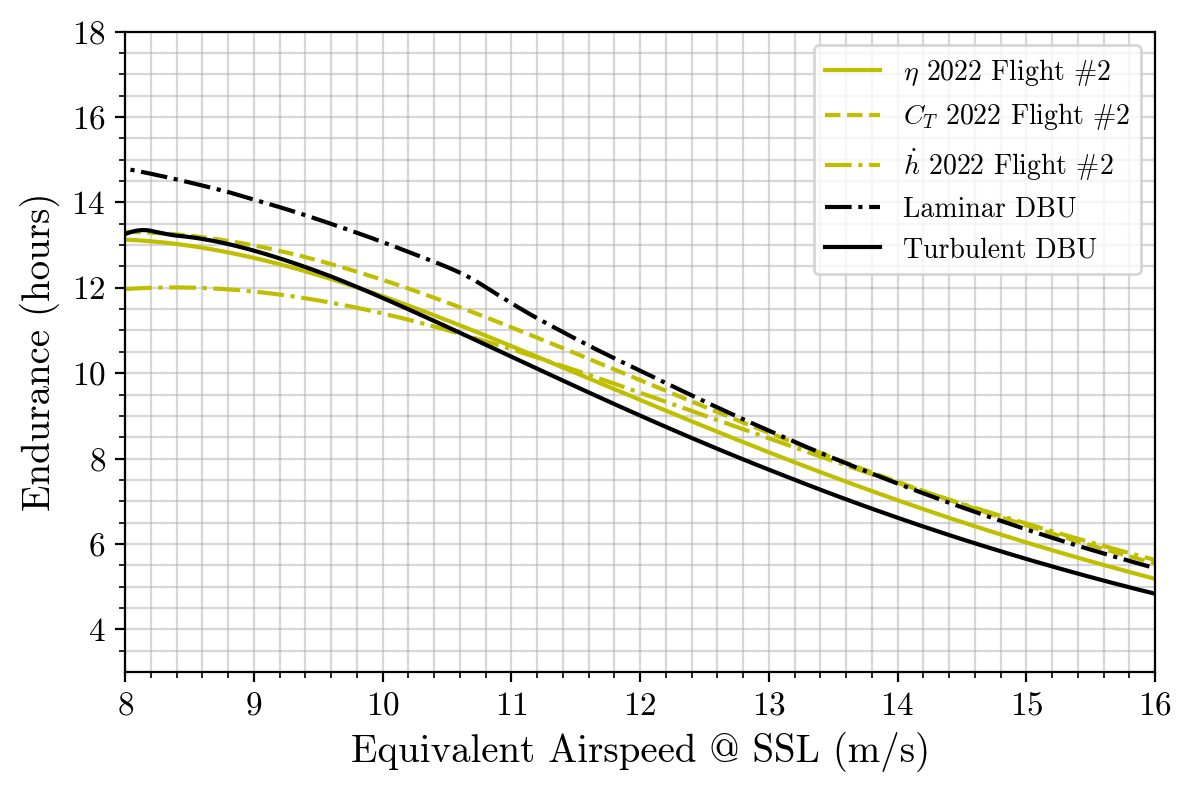

In [73]:
# Getting Power Required from Polars
[Preq_ct, EAS_ct] = cl_finders.rawpolar2preqew(createv, ct_cruise_segresult_2022_06_15.ave_polar.CL , ct_cruise_segresult_2022_06_15.ave_polar.CD)
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
end_cruise_glide_comparison_fit = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.polar2preqew(createv, eta_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='y', linestyle='solid', label="$\eta$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, ct_cruise_segresult_2022_06_15.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='y', linestyle='--', label="$C_T$ 2022 Flight #2")

[Preq, EAS] = cl_finders.polar2preqew(createv, glide_segresult_2022.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='y', linestyle='-.', label="$\dot{h}$ 2022 Flight #2")

plt.plot(EAS_XFLR5_Laminar, P_total/(Preq_XFLR5_Laminar/efficiency), linestyle='-.', color='black', marker='', label='Laminar DBU')
plt.plot(EAS_XFLR5_Turbulent, P_total/(Preq_XFLR5_Turbulent/efficiency), linestyle='solid', color='black', marker='', label='Turbulent DBU')

plt.legend(ncol=1, loc='best', fancybox=True)
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Endurance (hours)")
plt.xlim([8,16])
plt.ylim([3,18])
plt.show()

main.save_figure(end_cruise_glide_comparison_fit, f'{end_cruise_glide_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)